In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import glob

emr_co2 = pd.read_csv(r'co2_calc\emissions\total_all.csv')
global_co2 = pd.read_csv(r'co2_calc\global_emissions\total_all.csv')

In [97]:
# all_co2 = pd.read_csv(r'co2_calc\emissions\total_all.csv')
# global_co2 = pd.read_csv(r'co2_calc\global_emissions\total_all.csv')

# emr_all_co2 = all_co2.groupby('year').agg({'emissions': 'mean'}).reset_index().round(2)[:7]
# global_all_co2 = global_co2[:7]
def dash_plots(emr_co2, global_co2, emr_diet, global_diet, name:str, gender:str='all'):

    emr_all_co2 = emr_co2.groupby('year').agg({'emissions': 'mean'}).reset_index().round(0).astype({'emissions': int})[:7]
    global_all_co2 = global_co2[:7].round(0).astype({'emissions': int})

    emr_diet_ready = pd.DataFrame({'year': emr_diet.columns[1:8].astype(int), 'score': emr_diet.mean(axis=0, numeric_only=True).round(2)[:7].values})
    global_diet_ready = global_diet[:7]

    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
    # Plot CO2 emissions on the left y-axis
    ax1.plot(emr_all_co2['year'], emr_all_co2['emissions'], label='EMR CO2 Emissions', marker='o', color='blue')
    ax1.plot(global_all_co2['year'], global_all_co2['emissions'], label='Global CO2 Emissions', marker='o', color='green')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2 Emissions (gr CO2)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(1000, 2600)  # Set emissions axis limits
    ax1.grid(True)

    # Add vertical gridline for 2018
    ax1.axvline(x=2018, color='lightgray', linestyle='--', linewidth=0.7)

    # Add 2018 to the x-axis
    ax1.set_xticks(list(ax1.get_xticks()) + [2018])

    for i, row in emr_all_co2.iterrows():
        ax1.annotate(f"{row['emissions'].round()}",
                    (row['year'], row['emissions'].round()),
                    textcoords="offset points", xytext=(0, 5), ha='center',
                    fontsize=8, color='blue',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white', alpha=0.7))
    for i, row in global_all_co2.iterrows():
        ax1.annotate(f"{row['emissions'].round()}",
                    (row['year'], row['emissions'].round()),
                    textcoords="offset points", xytext=(0, 5), ha='center',
                    fontsize=8, color='green',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white', alpha=0.7))

    ax2 = ax1.twinx()
    ax2.plot(emr_diet_ready['year'], emr_diet_ready['score'], label=f'EMR {name} Scores', marker='s', color='red')
    ax2.plot(global_diet_ready['year'], global_diet_ready['score'], label=f'Global {name} Scores', marker='s', color='orange')
    ax2.set_ylabel(f'{name} Scores', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 5)  # Set score axis limits

    # Annotate scores
    for i, row in emr_diet_ready.iterrows():
        ax2.annotate(f"{row['score']}",
                    (row['year'], row['score']),
                    textcoords="offset points", xytext=(0, 5), ha='center',
                    fontsize=8, color='red',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
   
    for i, row in global_diet_ready.iterrows():
        if gender == 'females':
            ax2.annotate(f"{row['score']}",
                        (row['year'], row['score'] + 0.1),  # Adjust position to be slightly above the line
                        textcoords="offset points", xytext=(0, 10), ha='center',
                        fontsize=8, color='orange',
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))
        else:
            ax2.annotate(f"{row['score']}",
                        (row['year'], row['score'] - 0.1),  # Adjust position to be slightly below the line
                        textcoords="offset points", xytext=(0, -10), ha='center',
                        fontsize=8, color='orange',
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))
    if gender != 'all':
        fig.suptitle(f'Comparison of CO2 Emissions and {name} Scores for {gender}')
    else:
        fig.suptitle(f'Comparison of CO2 Emissions and {name} Scores')

    fig.legend(loc='center right',  bbox_to_anchor=(0.7, -0.01), ncol=2)  # Move legend outside
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make space for the legend
    os.makedirs(f'figures\{gender}', exist_ok=True)
    plt.savefig(f'figures\{gender}\{name}_co2_diet.png', dpi=300, bbox_inches='tight')
    plt.show()


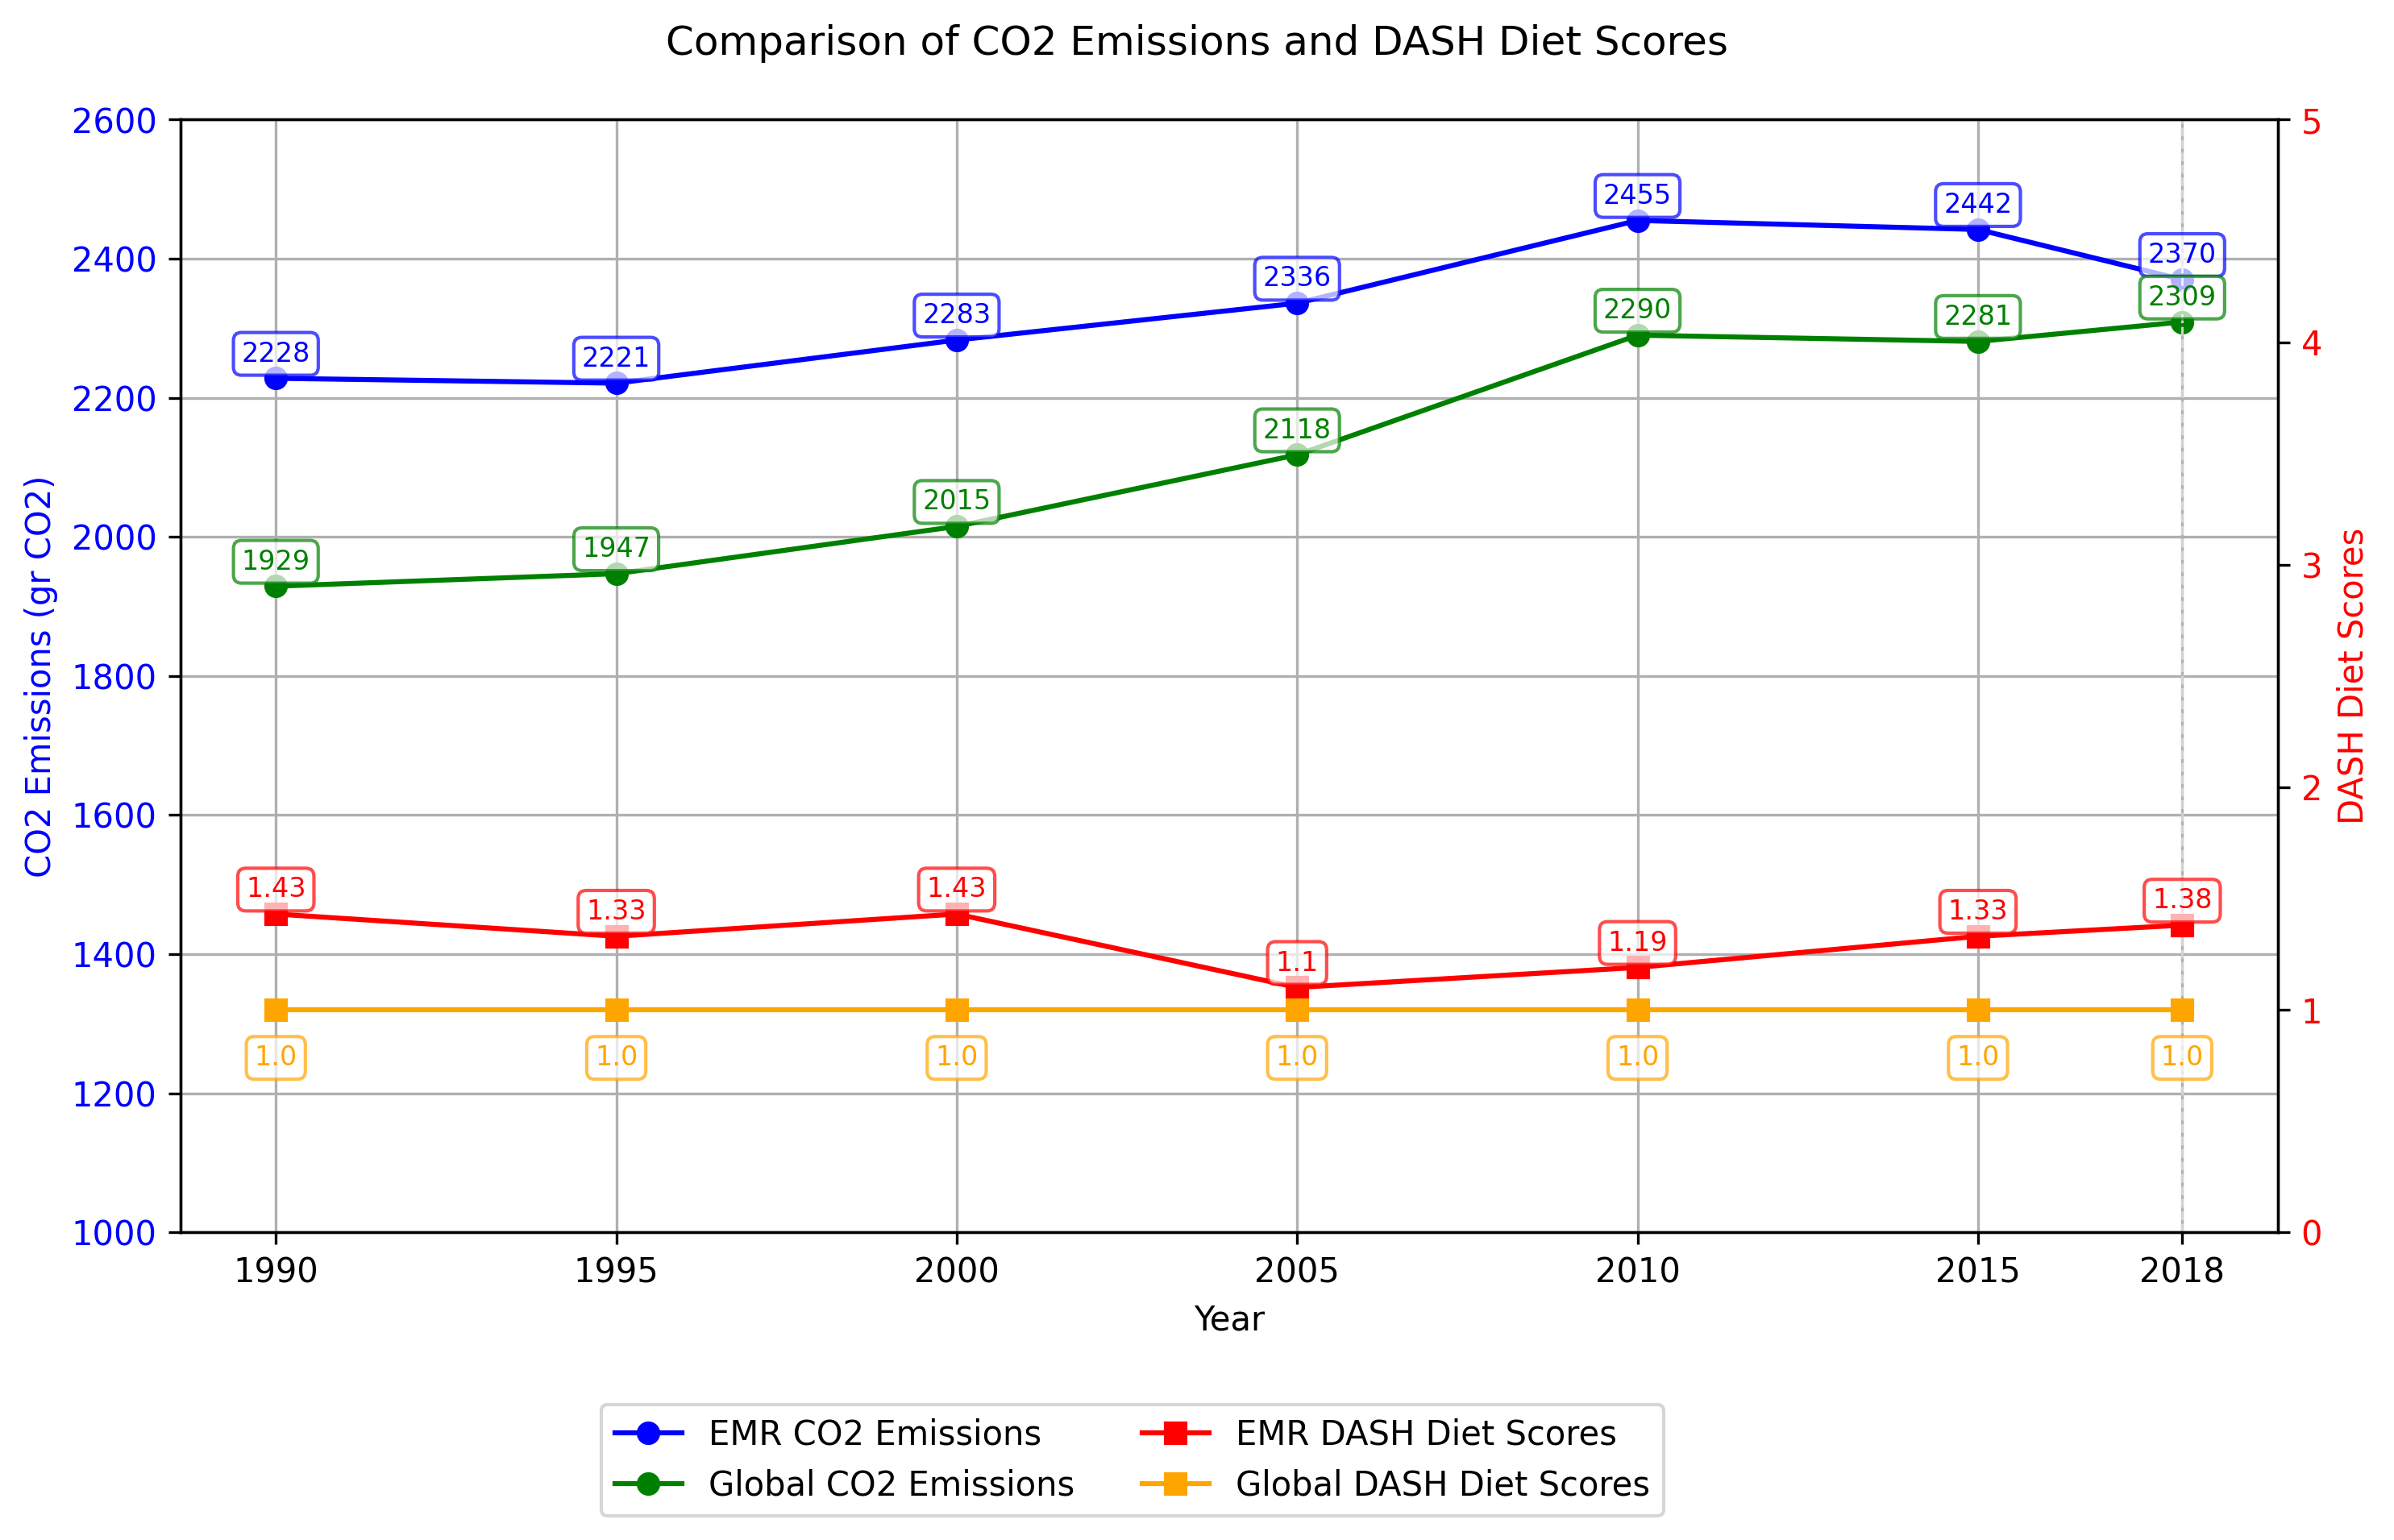

In [98]:
emr_co2 = pd.read_csv(r'co2_calc\emissions\total_all.csv')
global_co2 = pd.read_csv(r'co2_calc\global_emissions\total_all.csv')

dash_emr = pd.read_csv(r'diet_calc\scores\dash_dixon\total_all.csv')
dash_global = pd.read_csv(r'diet_calc\scores\dash_dixon\global\total_all.csv')

dash_plots(emr_co2, global_co2, dash_emr, dash_global, 'DASH Diet', 'all')

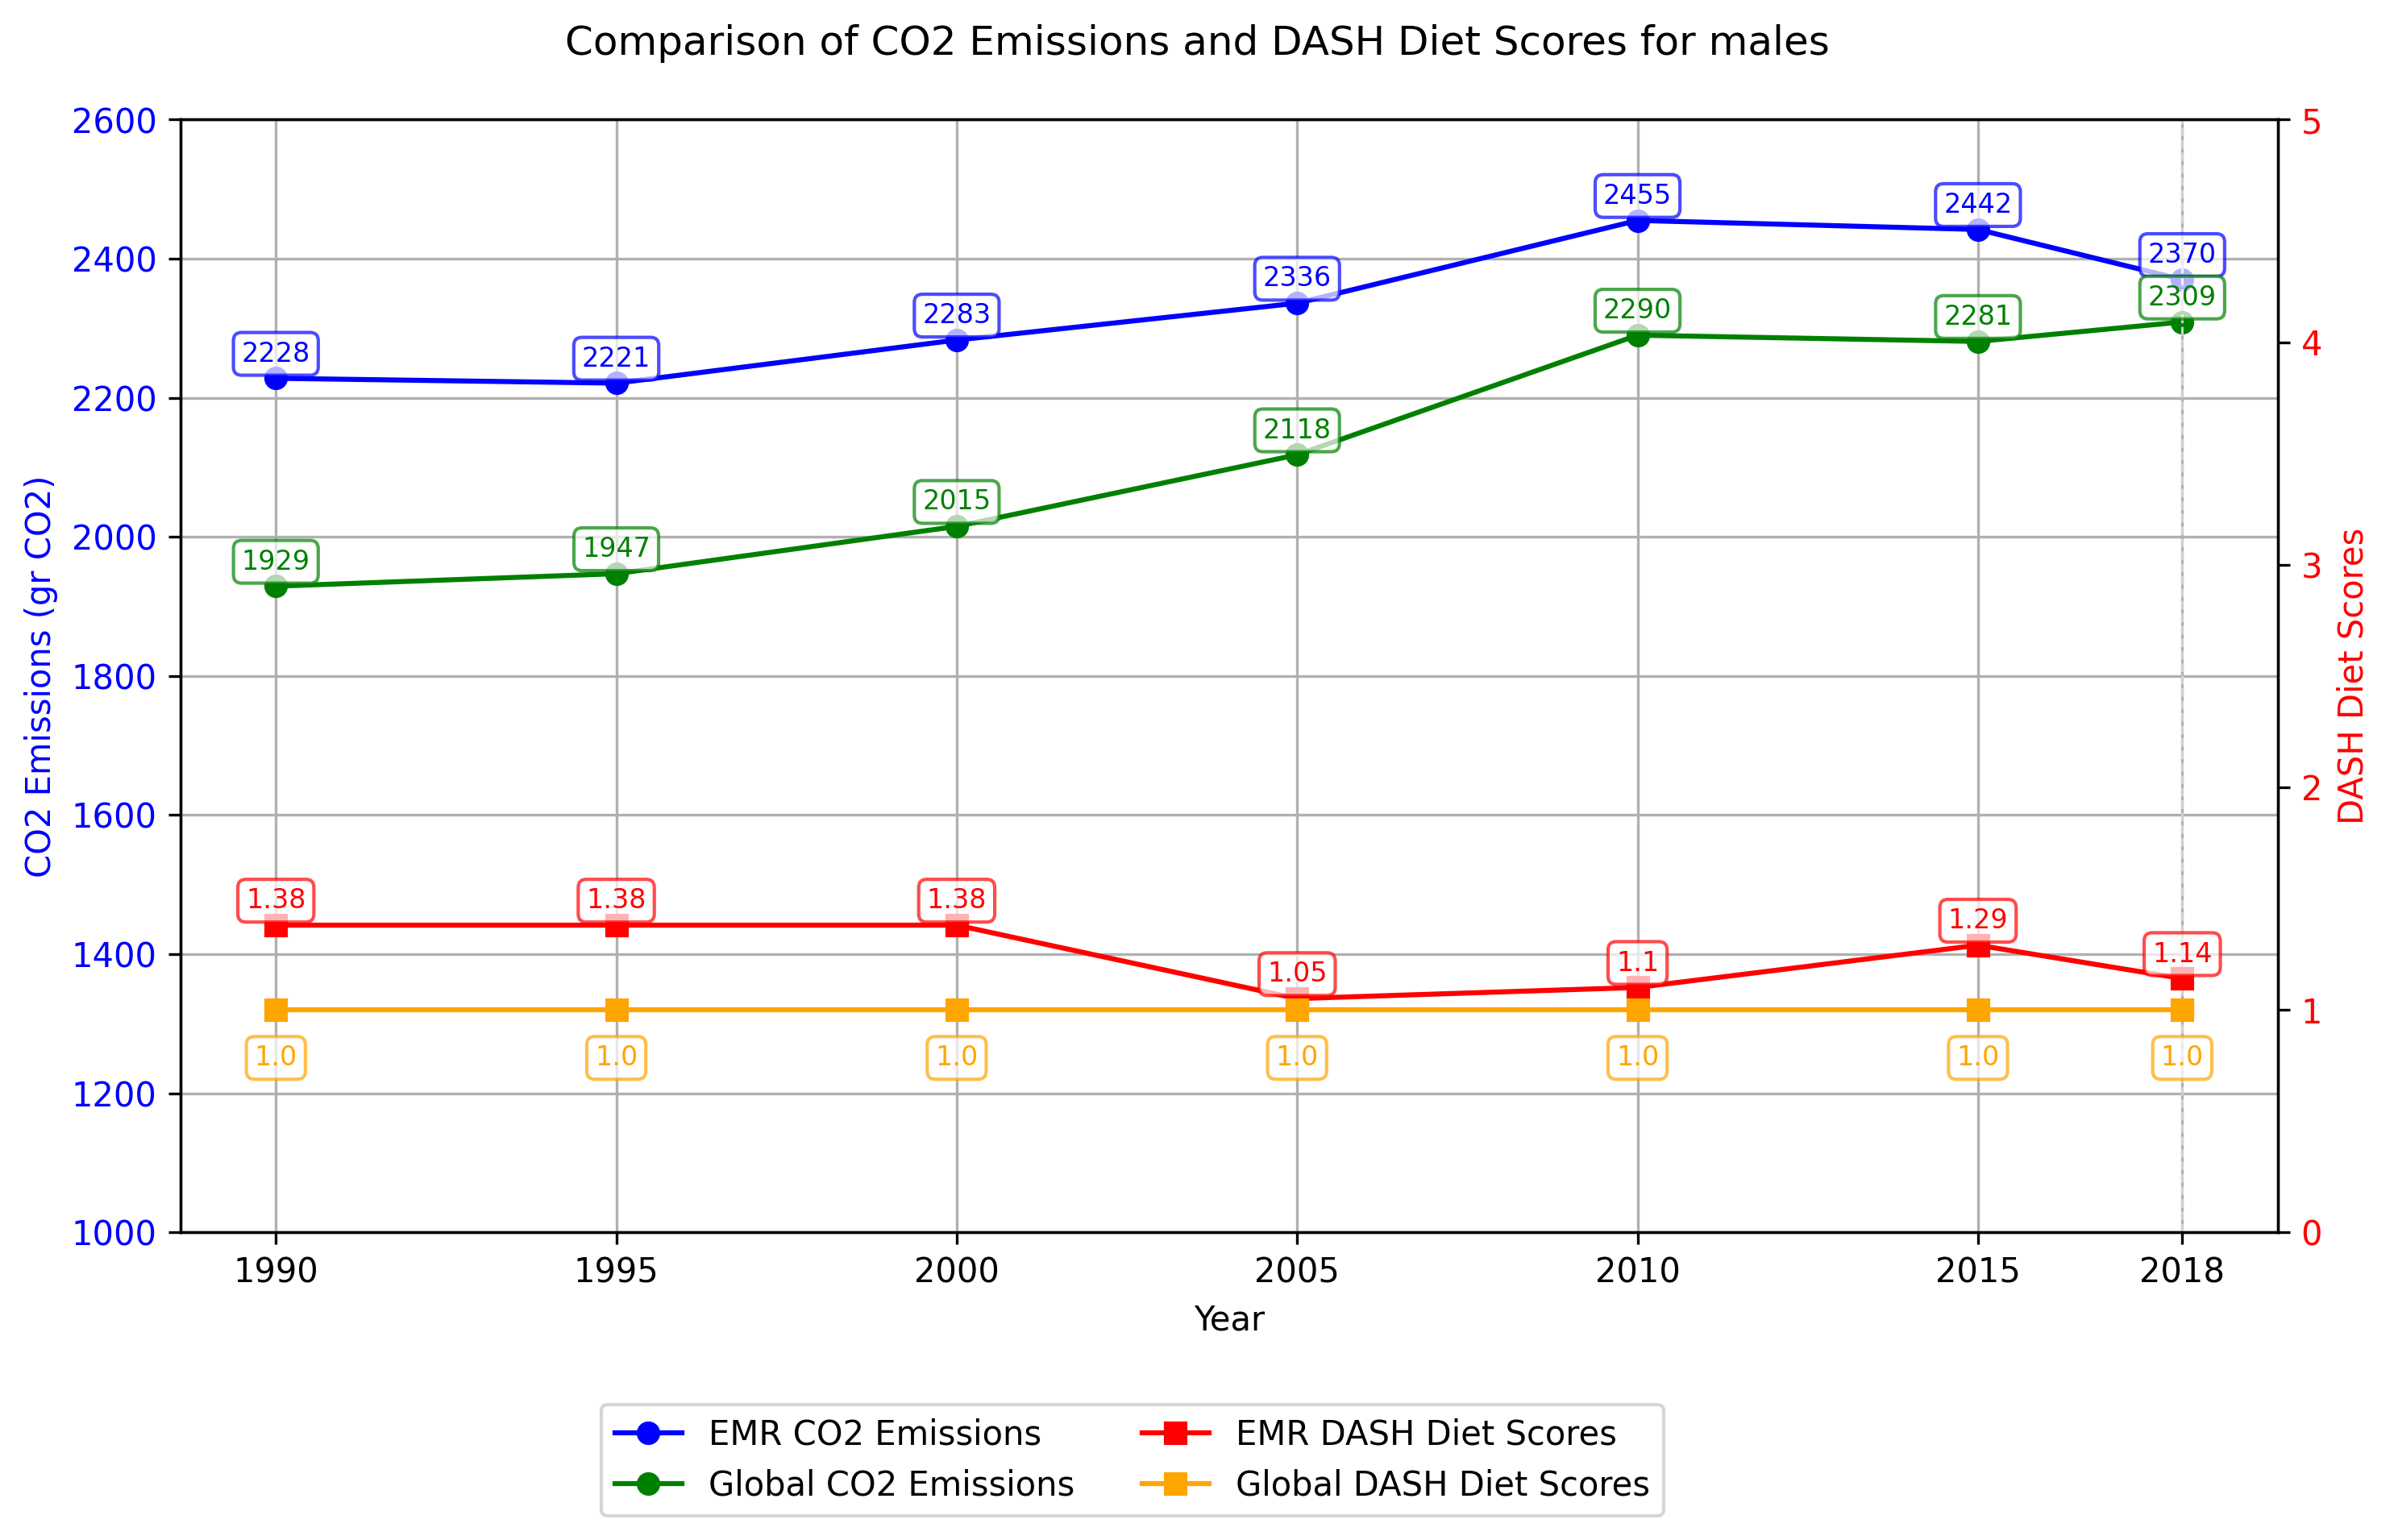

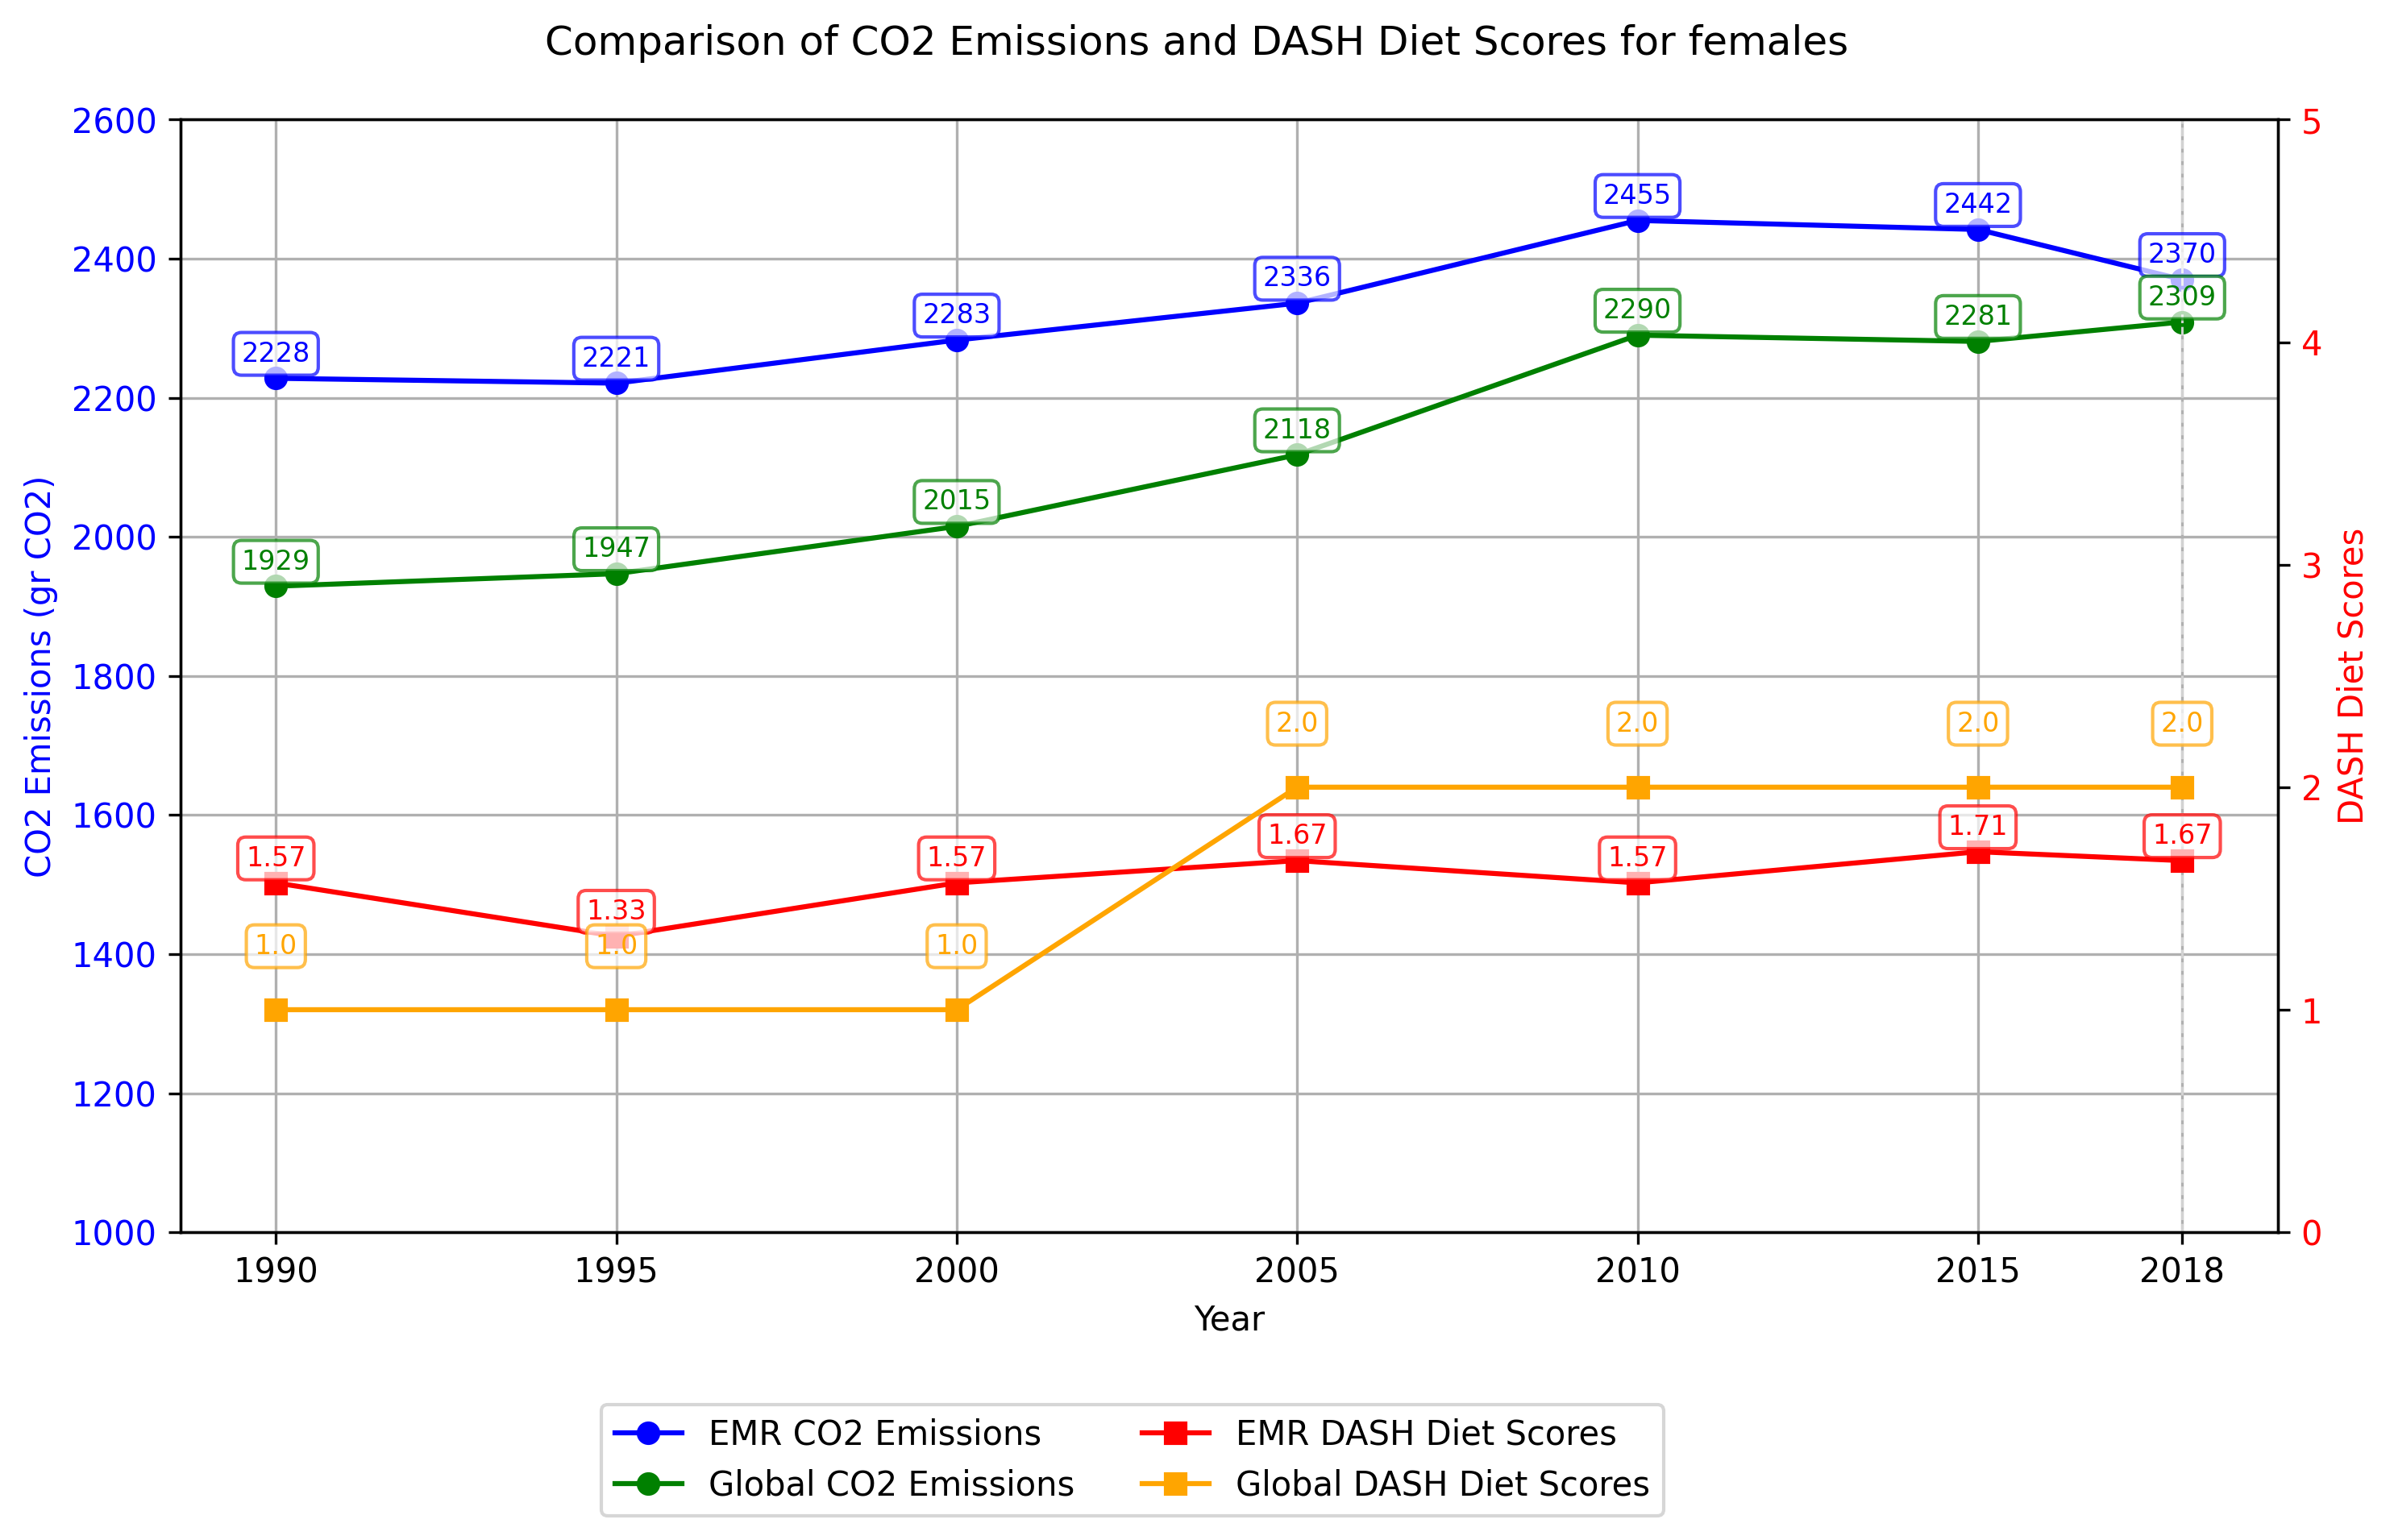

In [99]:
em_dash_male = pd.read_csv(r'diet_calc\scores\dash_dixon\total_males.csv')
gl_dash_male = pd.read_csv(r'diet_calc\scores\dash_dixon\global\total_males.csv')

em_dash_female = pd.read_csv(r'diet_calc\scores\dash_dixon\total_females.csv')
gl_dash_female = pd.read_csv(r'diet_calc\scores\dash_dixon\global\total_females.csv')

dash_plots(emr_co2, global_co2, em_dash_male, gl_dash_male, 'DASH Diet', 'males')
dash_plots(emr_co2, global_co2, em_dash_female, gl_dash_female, 'DASH Diet', 'females')

In [100]:
eat_global = pd.read_csv(r'diet_calc\scores\eat_global\total_all.csv')
eat_global = eat_global.transpose().reset_index()
eat_global.columns = ['year', 'score']
eat_global.drop(0, inplace=True)
eat_global

year score
1  1990   1.0
2  1995   2.0
3  2000   2.0
4  2005   2.0
5  2010   3.0
6  2015   3.0
7  2018   3.0

In [101]:
eat_emr = pd.read_csv(r'diet_calc\scores\eat\total_all.csv')
eat_emr 

Country  1990  1995  2000  2005  2010  2015  2018
0      AFG   1.0   3.0   2.0   3.0   2.0   1.0   2.0
1      ARE   3.0   3.0   3.0   2.0   4.0   3.0   3.0
2      BHR   2.0   3.0   2.0   3.0   4.0   3.0   3.0
3      DJI   2.0   2.0   3.0   1.0   1.0   4.0   3.0
4      EGY   3.0   3.0   2.0   1.0   1.0   1.0   1.0
5      IRN   1.0   2.0   2.0   3.0   4.0   4.0   4.0
6      IRQ   3.0   3.0   2.0   2.0   1.0   2.0   2.0
7      JOR   3.0   3.0   3.0   3.0   3.0   3.0   2.0
8      KWT   0.0   2.0   2.0   2.0   1.0   3.0   4.0
9      LBN   3.0   3.0   3.0   2.0   4.0   5.0   6.0
10     LBR   3.0   2.0   2.0   3.0   2.0   2.0   2.0
11     MAR   4.0   3.0   2.0   3.0   3.0   2.0   3.0
12     OMN   4.0   2.0   5.0   2.0   3.0   2.0   2.0
13     PAK   1.0   0.0   2.0   2.0   2.0   2.0   2.0
14     PSE   2.0   2.0   2.0   2.0   2.0   2.0   2.0
15     QAT   3.0   3.0   2.0   3.0   4.0   3.0   3.0
16     SAU   1.0   1.0   1.0   4.0   4.0   3.0   4.0
17     SDN   3.0   3.0   3.0   3.0   3.0   3.0   3.0
18     SYR   2.0   2.0   2.0   2.0   2.0   2.0   2.0
19     TUN   0.0   0.0   1.0   1.0   2.0   2.0   1.0
20     YEM   2.0   1.0   1.0   2.0   2.0   2.0   1.0

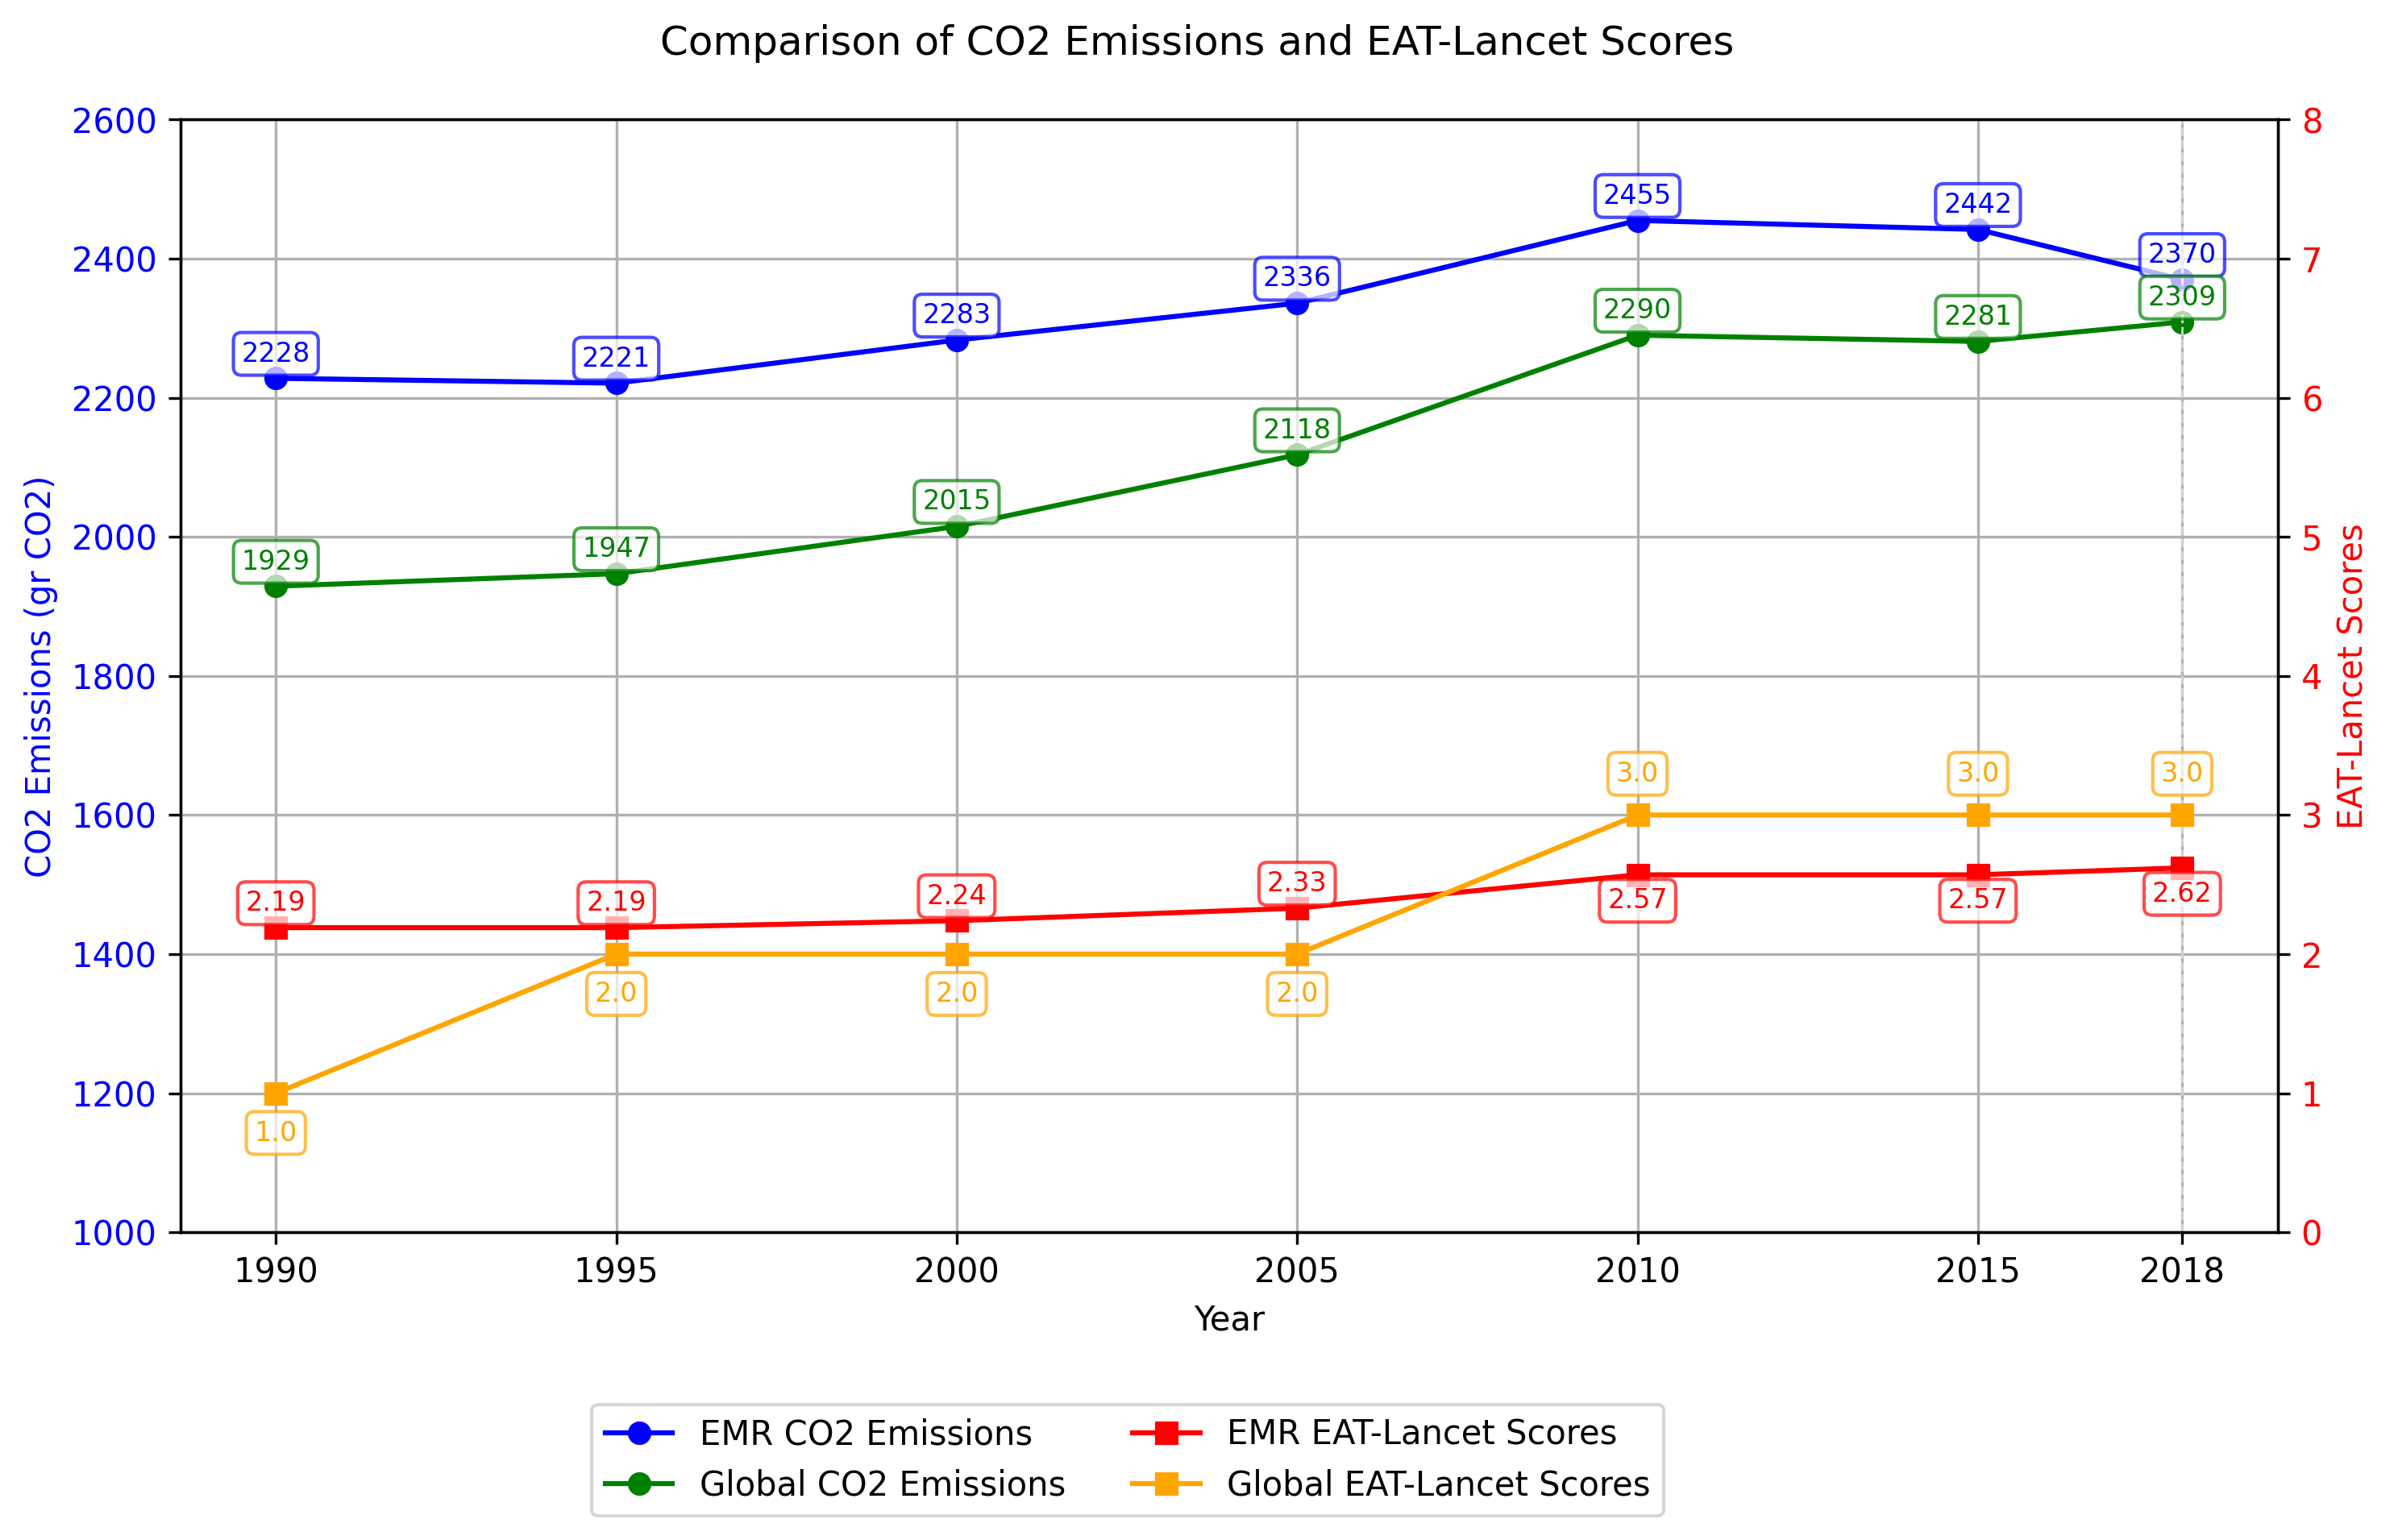

In [102]:
def eat_plots(emr_co2, global_co2, emr_diet, global_diet, name: str, gender: str = 'all'):
    # Prepare CO2 data
    emr_all_co2 = emr_co2.groupby('year').agg({'emissions': 'mean'}).reset_index().round(0).astype({'emissions': int})[:7]
    global_all_co2 = global_co2[:7].round(0).astype({'emissions': int})

    # Prepare diet data
    emr_diet_ready = pd.DataFrame({'year': emr_diet.columns[1:].astype(int), 'score': emr_diet.mean(axis=0, numeric_only=True).round(2).values})
    global_diet_ready = global_diet.astype({'year': int, 'score': float})

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

    # Plot CO2 emissions on the left y-axis
    ax1.plot(emr_all_co2['year'], emr_all_co2['emissions'], label='EMR CO2 Emissions', marker='o', color='blue')
    ax1.plot(global_all_co2['year'], global_all_co2['emissions'], label='Global CO2 Emissions', marker='o', color='green')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2 Emissions (gr CO2)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(1000, 2600)  # Set emissions axis limits
    ax1.grid(True)

    # Add vertical gridline for 2018
    ax1.axvline(x=2018, color='lightgray', linestyle='--', linewidth=0.7)

    # Add 2018 to the x-axis
    ax1.set_xticks(list(ax1.get_xticks()) + [2018])

    # Annotate emissions
    for i, row in emr_all_co2.iterrows():
        ax1.annotate(f"{row['emissions'].round()}",
                     (row['year'], row['emissions'].round()),
                     textcoords="offset points", xytext=(0, 5), ha='center',
                     fontsize=8, color='blue',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white', alpha=0.7))
    for i, row in global_all_co2.iterrows():
        ax1.annotate(f"{row['emissions'].round()}",
                     (row['year'], row['emissions'].round()),
                     textcoords="offset points", xytext=(0, 5), ha='center',
                     fontsize=8, color='green',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white', alpha=0.7))

    # Create a second y-axis for EAT scores
    ax2 = ax1.twinx()
    ax2.plot(emr_diet_ready['year'], emr_diet_ready['score'], label=f'EMR {name} Scores', marker='s', color='red')
    ax2.plot(global_diet_ready['year'], global_diet_ready['score'], label=f'Global {name} Scores', marker='s', color='orange')
    ax2.set_ylabel(f'{name} Scores', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 8)  # Set score axis limits

    if gender == 'males':
        # Annotate scores for males 
        for i, row in emr_diet_ready.iterrows():
            ax2.annotate(f"{row['score']}",
                        (row['year'], row['score']),
                        textcoords="offset points", xytext=(0, 5), ha='center',
                        fontsize=8, color='red',
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
        for i, row in global_diet_ready.iterrows():
            ax2.annotate(f"{row['score']}",
                        (row['year'], row['score'] - 0.1),  # Adjust position to be slightly below the line
                        textcoords="offset points", xytext=(0, -10), ha='center',
                        fontsize=8, color='orange',
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))
    else:
        # Annotate scores
        for i, row in emr_diet_ready.iterrows():
            if row['year'] in [2010, 2015, 2018]:
                ax2.annotate(f"{row['score']}",
                            (row['year'], row['score']),
                            textcoords="offset points", xytext=(0, -10), ha='center',
                            fontsize=8, color='red',
                            bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
            else:
                ax2.annotate(f"{row['score']}",
                            (row['year'], row['score']),
                            textcoords="offset points", xytext=(0, 5), ha='center',
                            fontsize=8, color='red',
                            bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
        for i, row in global_diet_ready.iterrows():
            if row['year'] in [2010, 2015, 2018]:
                ax2.annotate(f"{row['score']}",
                            (row['year'], row['score']),
                            textcoords="offset points", xytext=(0, 10), ha='center',
                            fontsize=8, color='orange',
                            bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))
            else:
                ax2.annotate(f"{row['score']}",
                            (row['year'], row['score'] - 0.1),  # Adjust position to be slightly below the line
                            textcoords="offset points", xytext=(0, -10), ha='center',
                            fontsize=8, color='orange',
                            bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))

    # Title and legend
    if gender != 'all':
        fig.suptitle(f'Comparison of CO2 Emissions and {name} Scores for {gender}')
    else:
        fig.suptitle(f'Comparison of CO2 Emissions and {name} Scores')

    fig.legend(loc='center right', bbox_to_anchor=(0.7, -0.01), ncol=2)  # Move legend outside
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make space for the legend
    os.makedirs(f'figures\{gender}', exist_ok=True)
    plt.savefig(f'figures\{gender}\{name}_co2_diet.png', dpi=300, bbox_inches='tight')
    plt.show()

eat_plots(emr_co2, global_co2, eat_emr, eat_global, 'EAT-Lancet', 'all')

In [3]:
def eat_fix (df):
    df = df.transpose().reset_index()
    df.columns = ['year', 'score']
    df.drop(0, inplace=True)
    df['year'] = df['year'].astype(int)
    df['score'] = df['score'].astype(float)
    return df

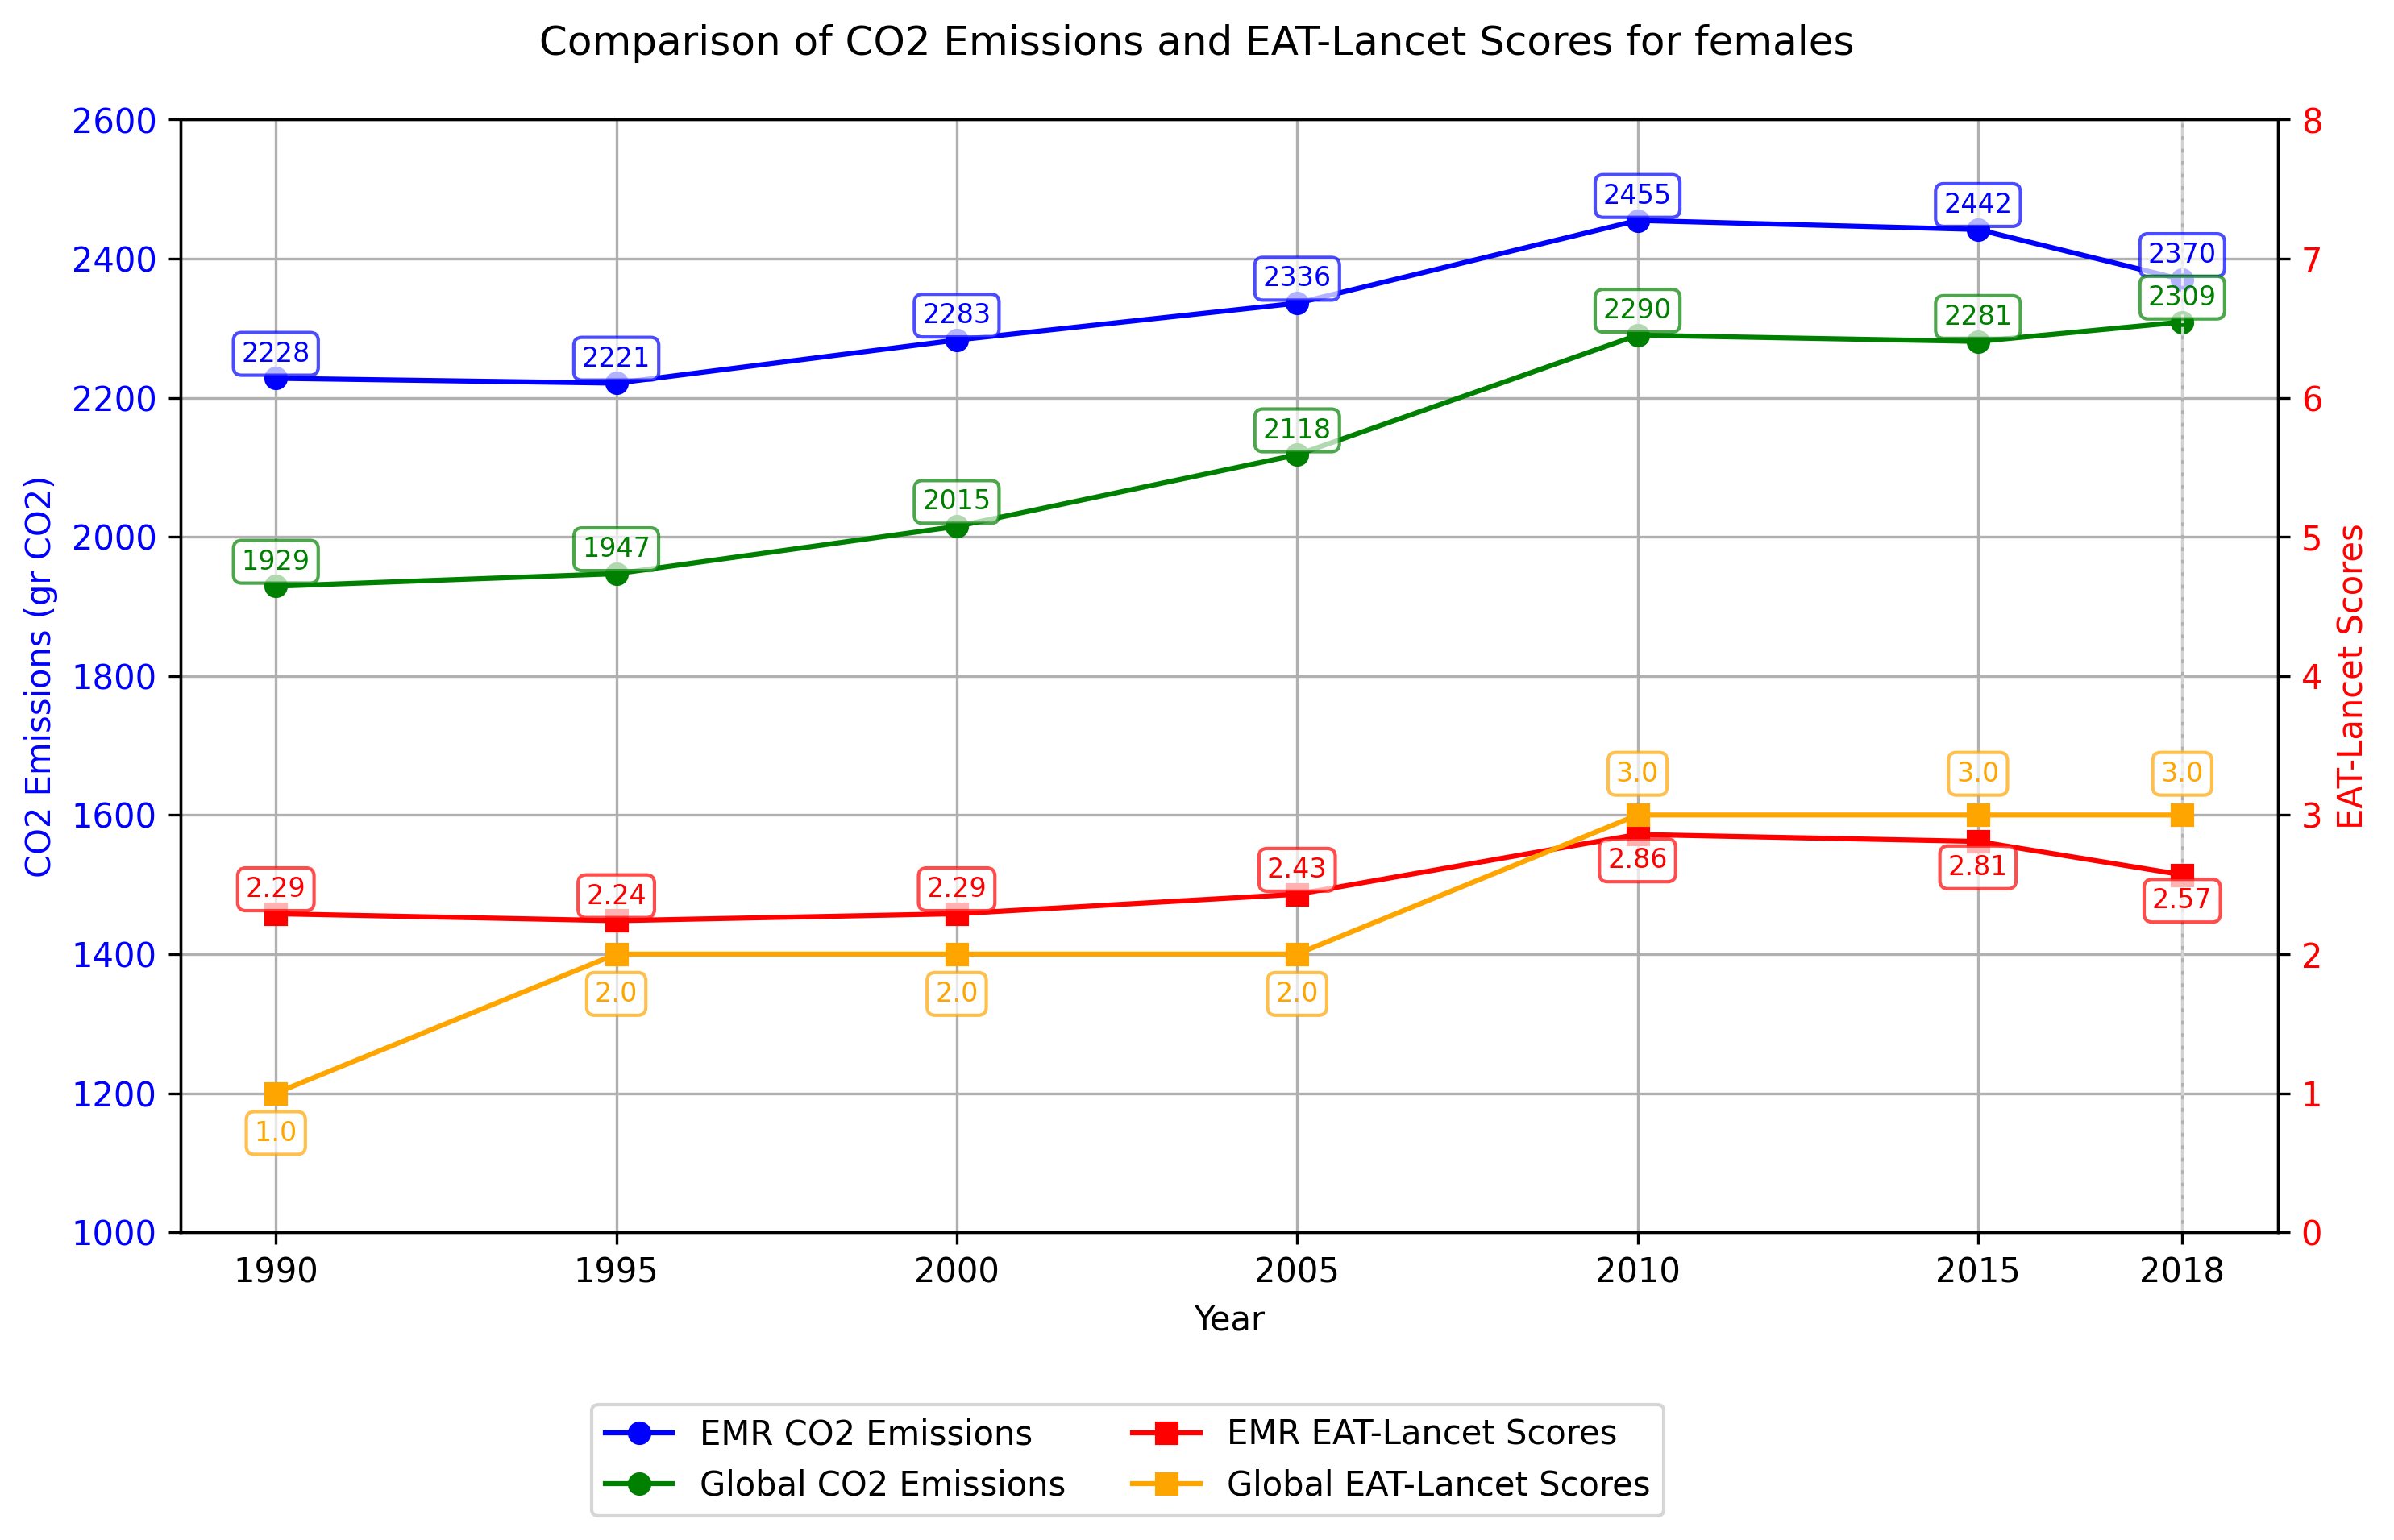

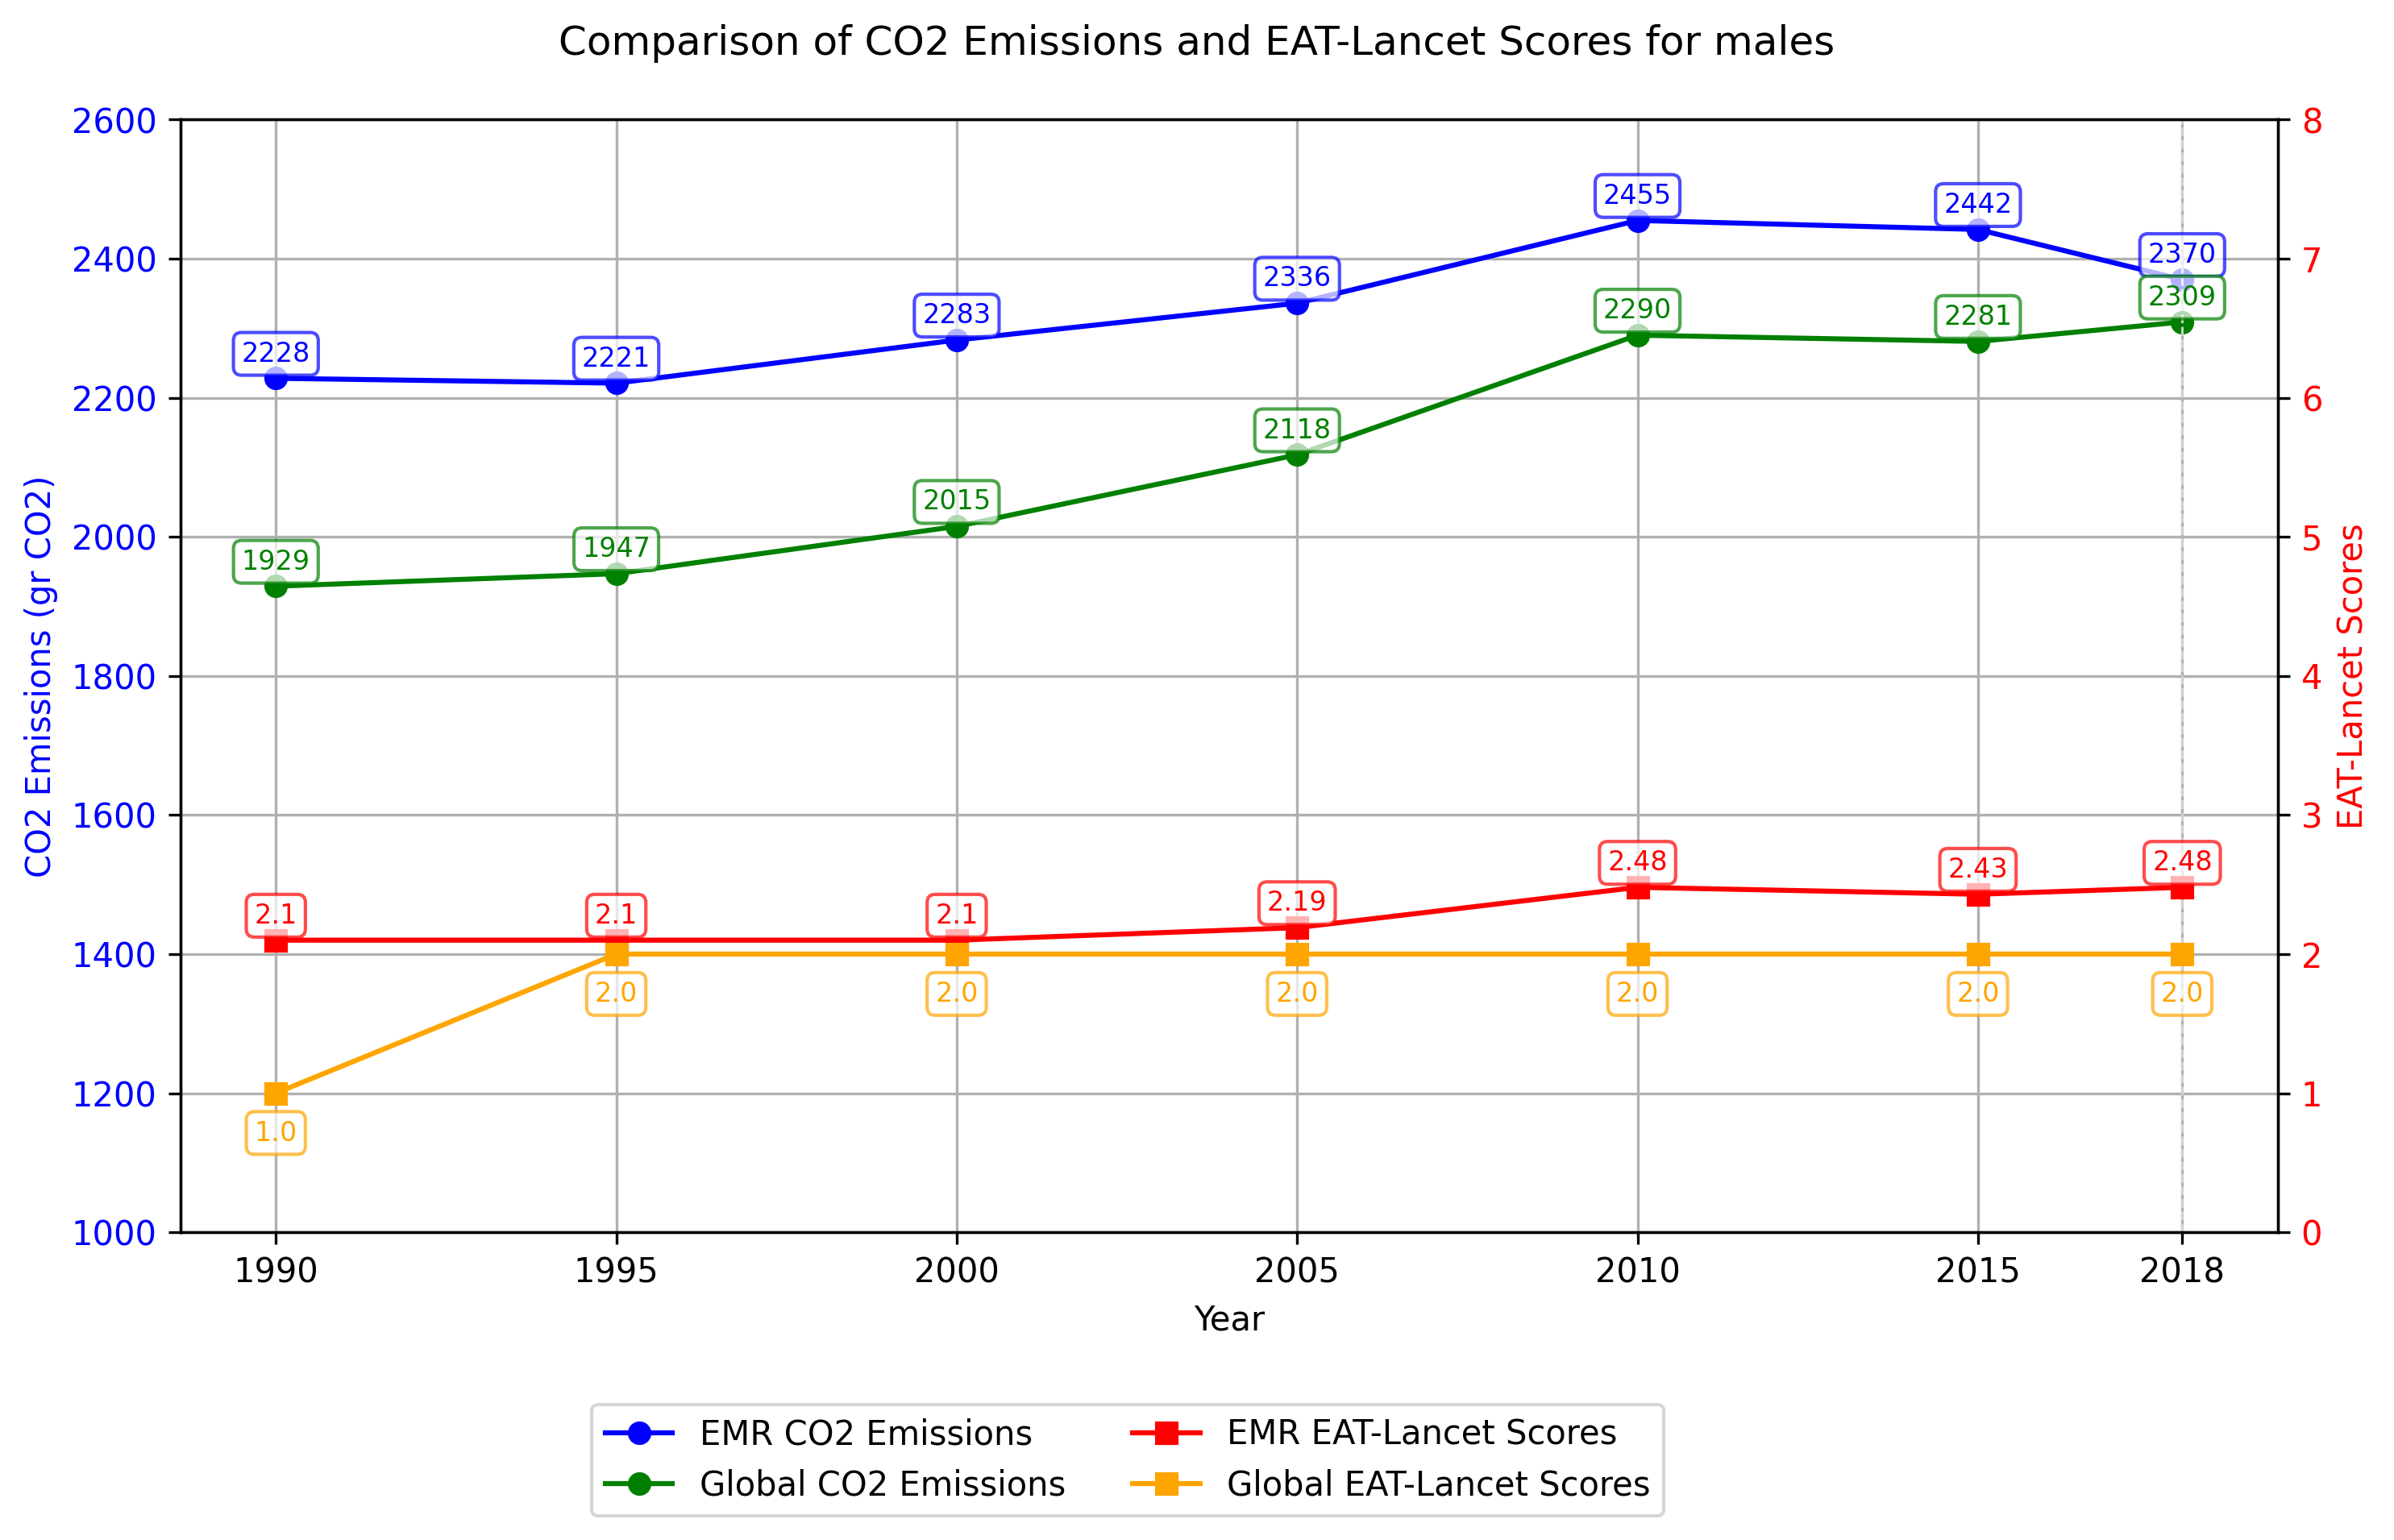

In [104]:
em_eat_male = pd.read_csv(r'diet_calc\scores\eat\total_males.csv')
gl_eat_male = pd.read_csv(r'diet_calc\scores\eat_global\total_males.csv')
gl_eat_male = eat_fix(gl_eat_male)

em_eat_female = pd.read_csv(r'diet_calc\scores\eat\total_females.csv')
gl_eat_female = pd.read_csv(r'diet_calc\scores\eat_global\total_females.csv')
gl_eat_female = eat_fix(gl_eat_female)

# Generate the plots for females using eat_plots
eat_plots(emr_co2, global_co2, em_eat_female, gl_eat_female, 'EAT-Lancet', 'females')
eat_plots(emr_co2, global_co2, em_eat_male, gl_eat_male, 'EAT-Lancet', 'males')

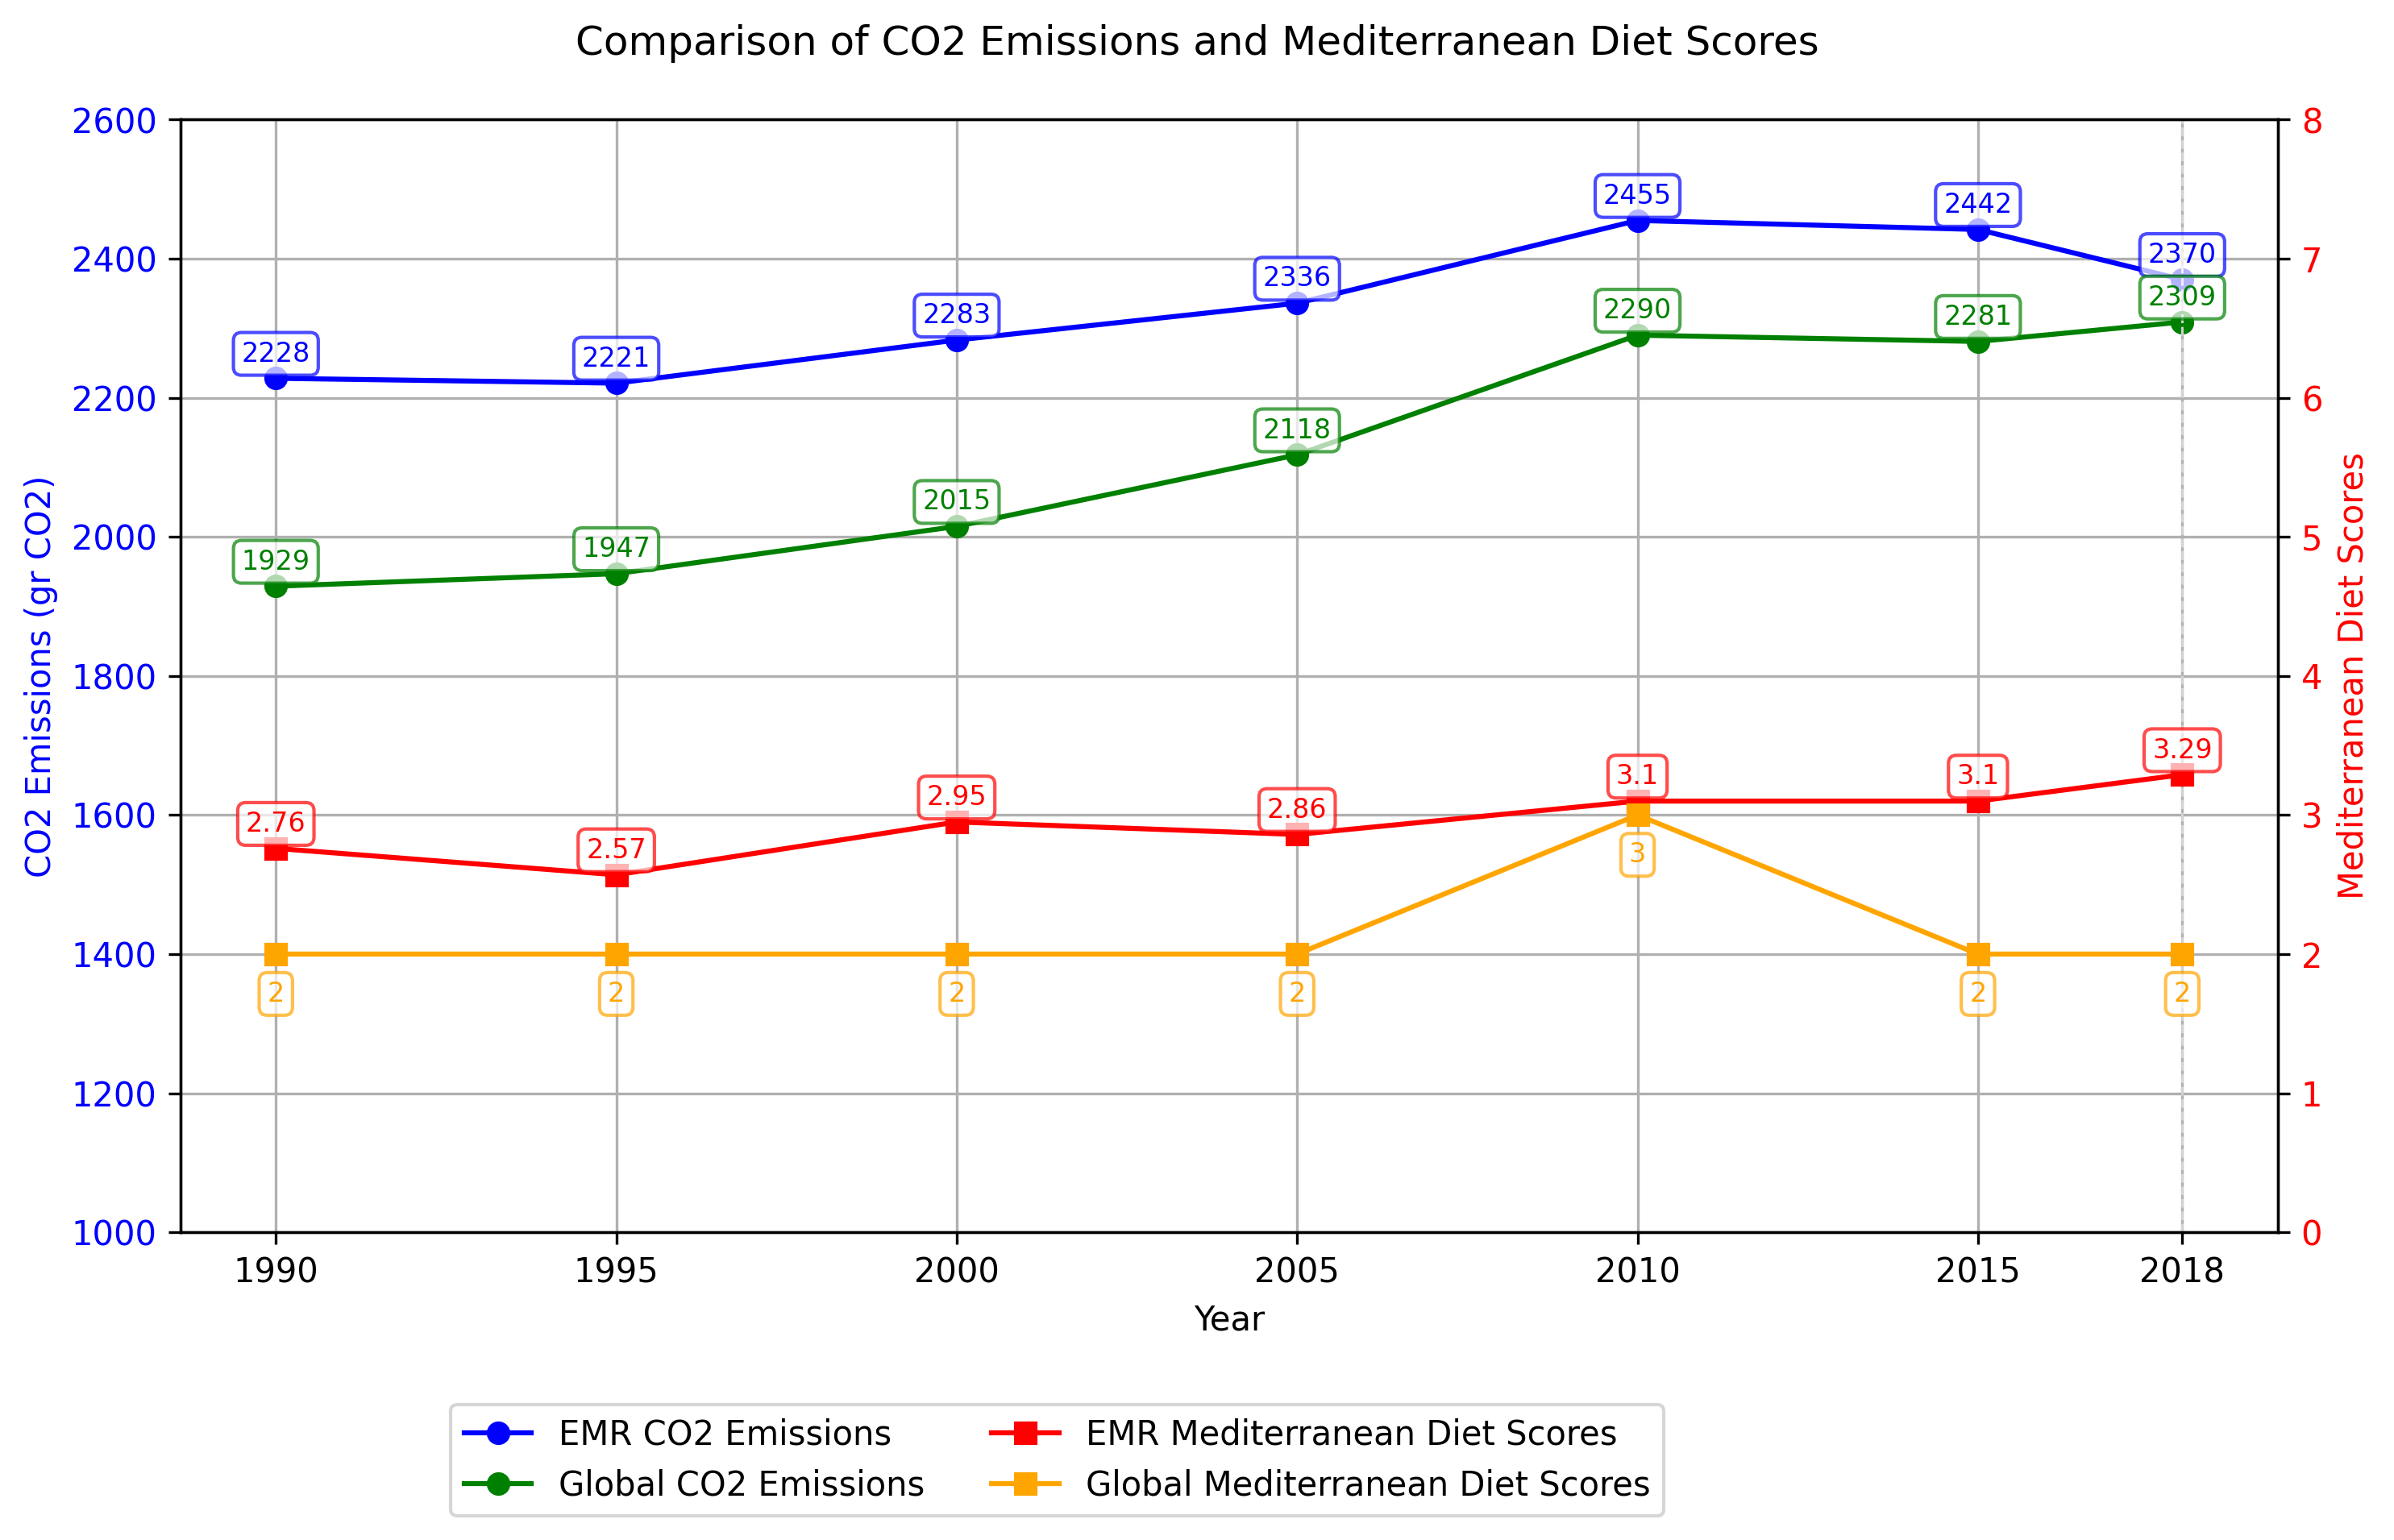

In [105]:
emr_medit = pd.read_csv(r'diet_calc\scores\medit_new\total_all.csv')
glo_medit = pd.read_csv(r'diet_calc\scores\medit_new\global\total_all.csv')

def medit_plots(emr_co2, global_co2, emr_diet, global_diet, name: str, gender: str = 'all'):
    emr_all_co2 = emr_co2.groupby('year').agg({'emissions': 'mean'}).reset_index().round(0).astype({'emissions': int})[:7]
    global_all_co2 = global_co2[:7].round(0).astype({'emissions': int})

    emr_diet_ready = pd.DataFrame({'year': emr_diet.columns[1:8].astype(int), 'score': emr_diet.mean(axis=0, numeric_only=True).round(2)[:7].values})
    global_diet_ready = global_diet[:7]

    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
    # Plot CO2 emissions on the left y-axis
    ax1.plot(emr_all_co2['year'], emr_all_co2['emissions'], label='EMR CO2 Emissions', marker='o', color='blue')
    ax1.plot(global_all_co2['year'], global_all_co2['emissions'], label='Global CO2 Emissions', marker='o', color='green')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2 Emissions (gr CO2)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(1000, 2600)  # Set emissions axis limits
    ax1.grid(True)

    # Add vertical gridline for 2018
    ax1.axvline(x=2018, color='lightgray', linestyle='--', linewidth=0.7)

    # Add 2018 to the x-axis
    ax1.set_xticks(list(ax1.get_xticks()) + [2018])

    for i, row in emr_all_co2.iterrows():
        ax1.annotate(f"{row['emissions'].round()}",
                     (row['year'], row['emissions'].round()),
                     textcoords="offset points", xytext=(0, 5), ha='center',
                     fontsize=8, color='blue',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white', alpha=0.7))
    for i, row in global_all_co2.iterrows():
        ax1.annotate(f"{row['emissions'].round()}",
                     (row['year'], row['emissions'].round()),
                     textcoords="offset points", xytext=(0, 5), ha='center',
                     fontsize=8, color='green',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white', alpha=0.7))

    ax2 = ax1.twinx()
    ax2.plot(emr_diet_ready['year'], emr_diet_ready['score'], label=f'EMR {name} Scores', marker='s', color='red')
    ax2.plot(global_diet_ready['year'], global_diet_ready['score'], label=f'Global {name} Scores', marker='s', color='orange')
    ax2.set_ylabel(f'{name} Scores', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 8)  # Set score axis limits

    # Annotate scores
    for i, row in emr_diet_ready.iterrows():
        ax2.annotate(f"{row['score']}",
                     (row['year'], row['score']),
                     textcoords="offset points", xytext=(0, 5), ha='center',
                     fontsize=8, color='red',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
    for i, row in global_diet_ready.iterrows():
        ax2.annotate(f"{row['score']}",
                     (row['year'], row['score'] - 0.1),  # Adjust position to be slightly below the line
                     textcoords="offset points", xytext=(0, -10), ha='center',
                     fontsize=8, color='orange',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))

    if gender != 'all':
        fig.suptitle(f'Comparison of CO2 Emissions and {name} Scores for {gender}')
    else:
        fig.suptitle(f'Comparison of CO2 Emissions and {name} Scores')

    fig.legend(loc='center right', bbox_to_anchor=(0.7, -0.01), ncol=2)  # Move legend outside
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make space for the legend
    os.makedirs(f'figures\{gender}', exist_ok=True)
    plt.savefig(f'figures\{gender}\{name}_co2_diet.png', dpi=300, bbox_inches='tight')
    plt.show()

medit_plots(emr_co2, global_co2, emr_medit, glo_medit, 'Mediterranean Diet', 'all')

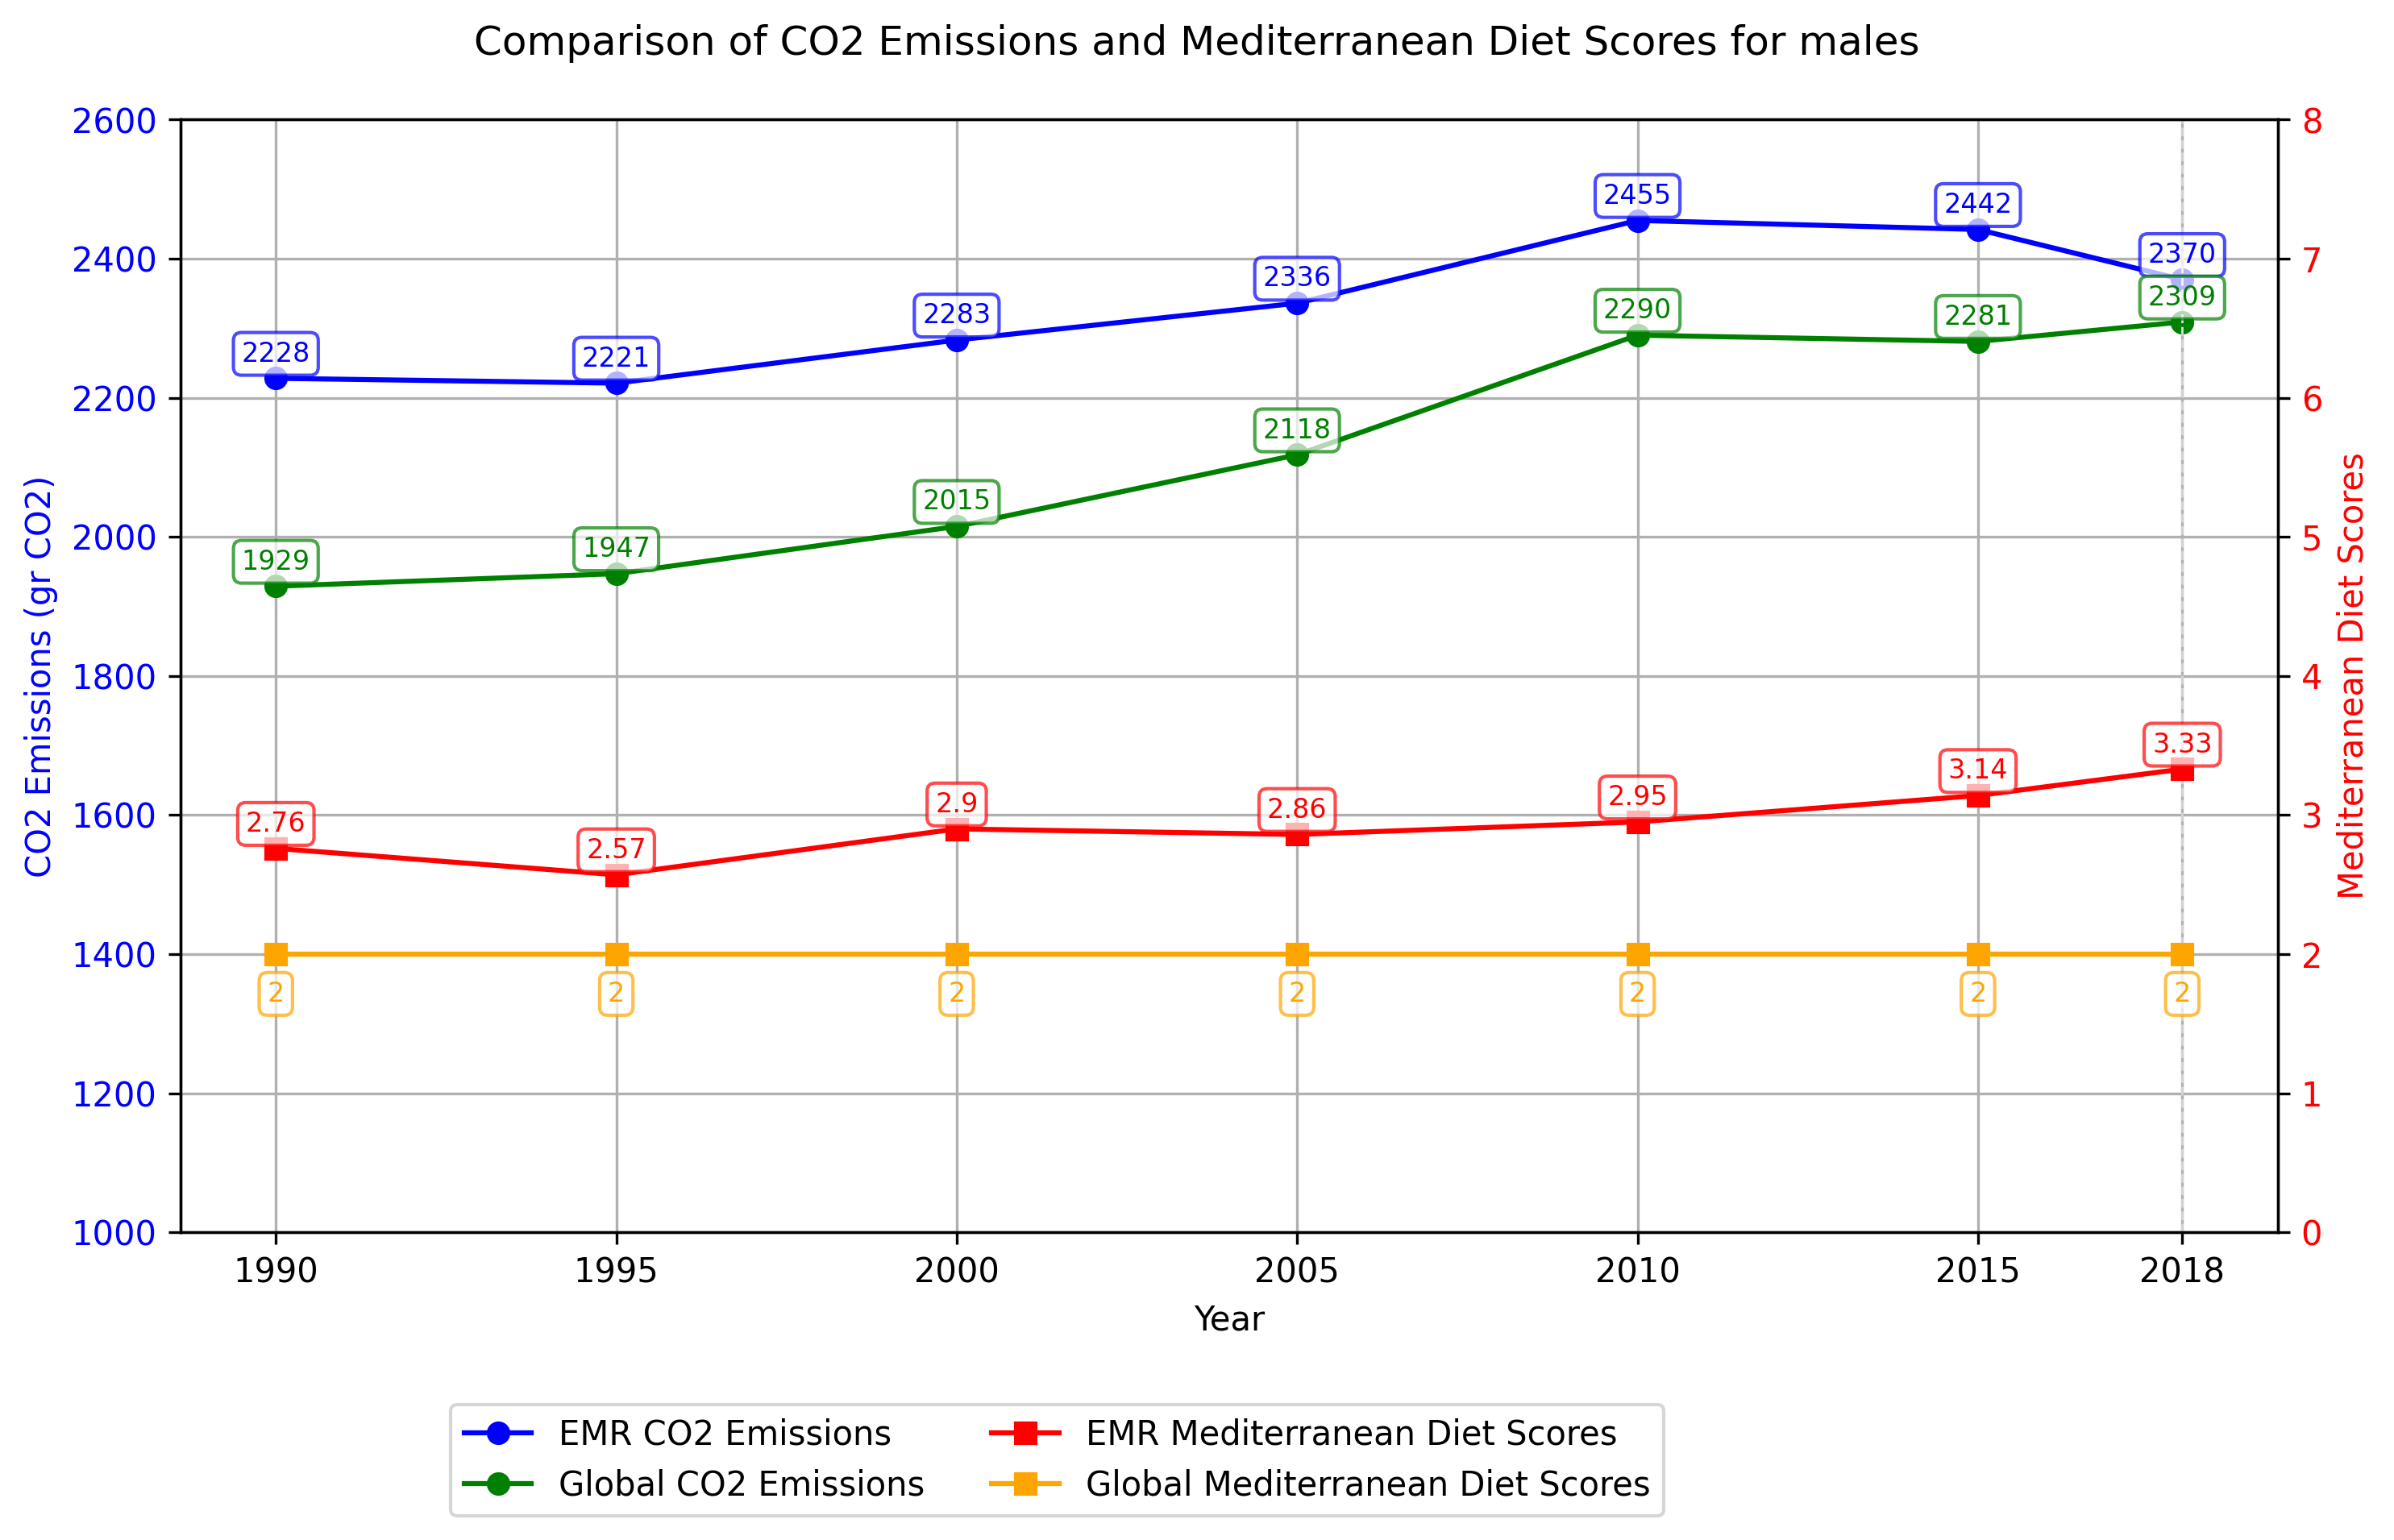

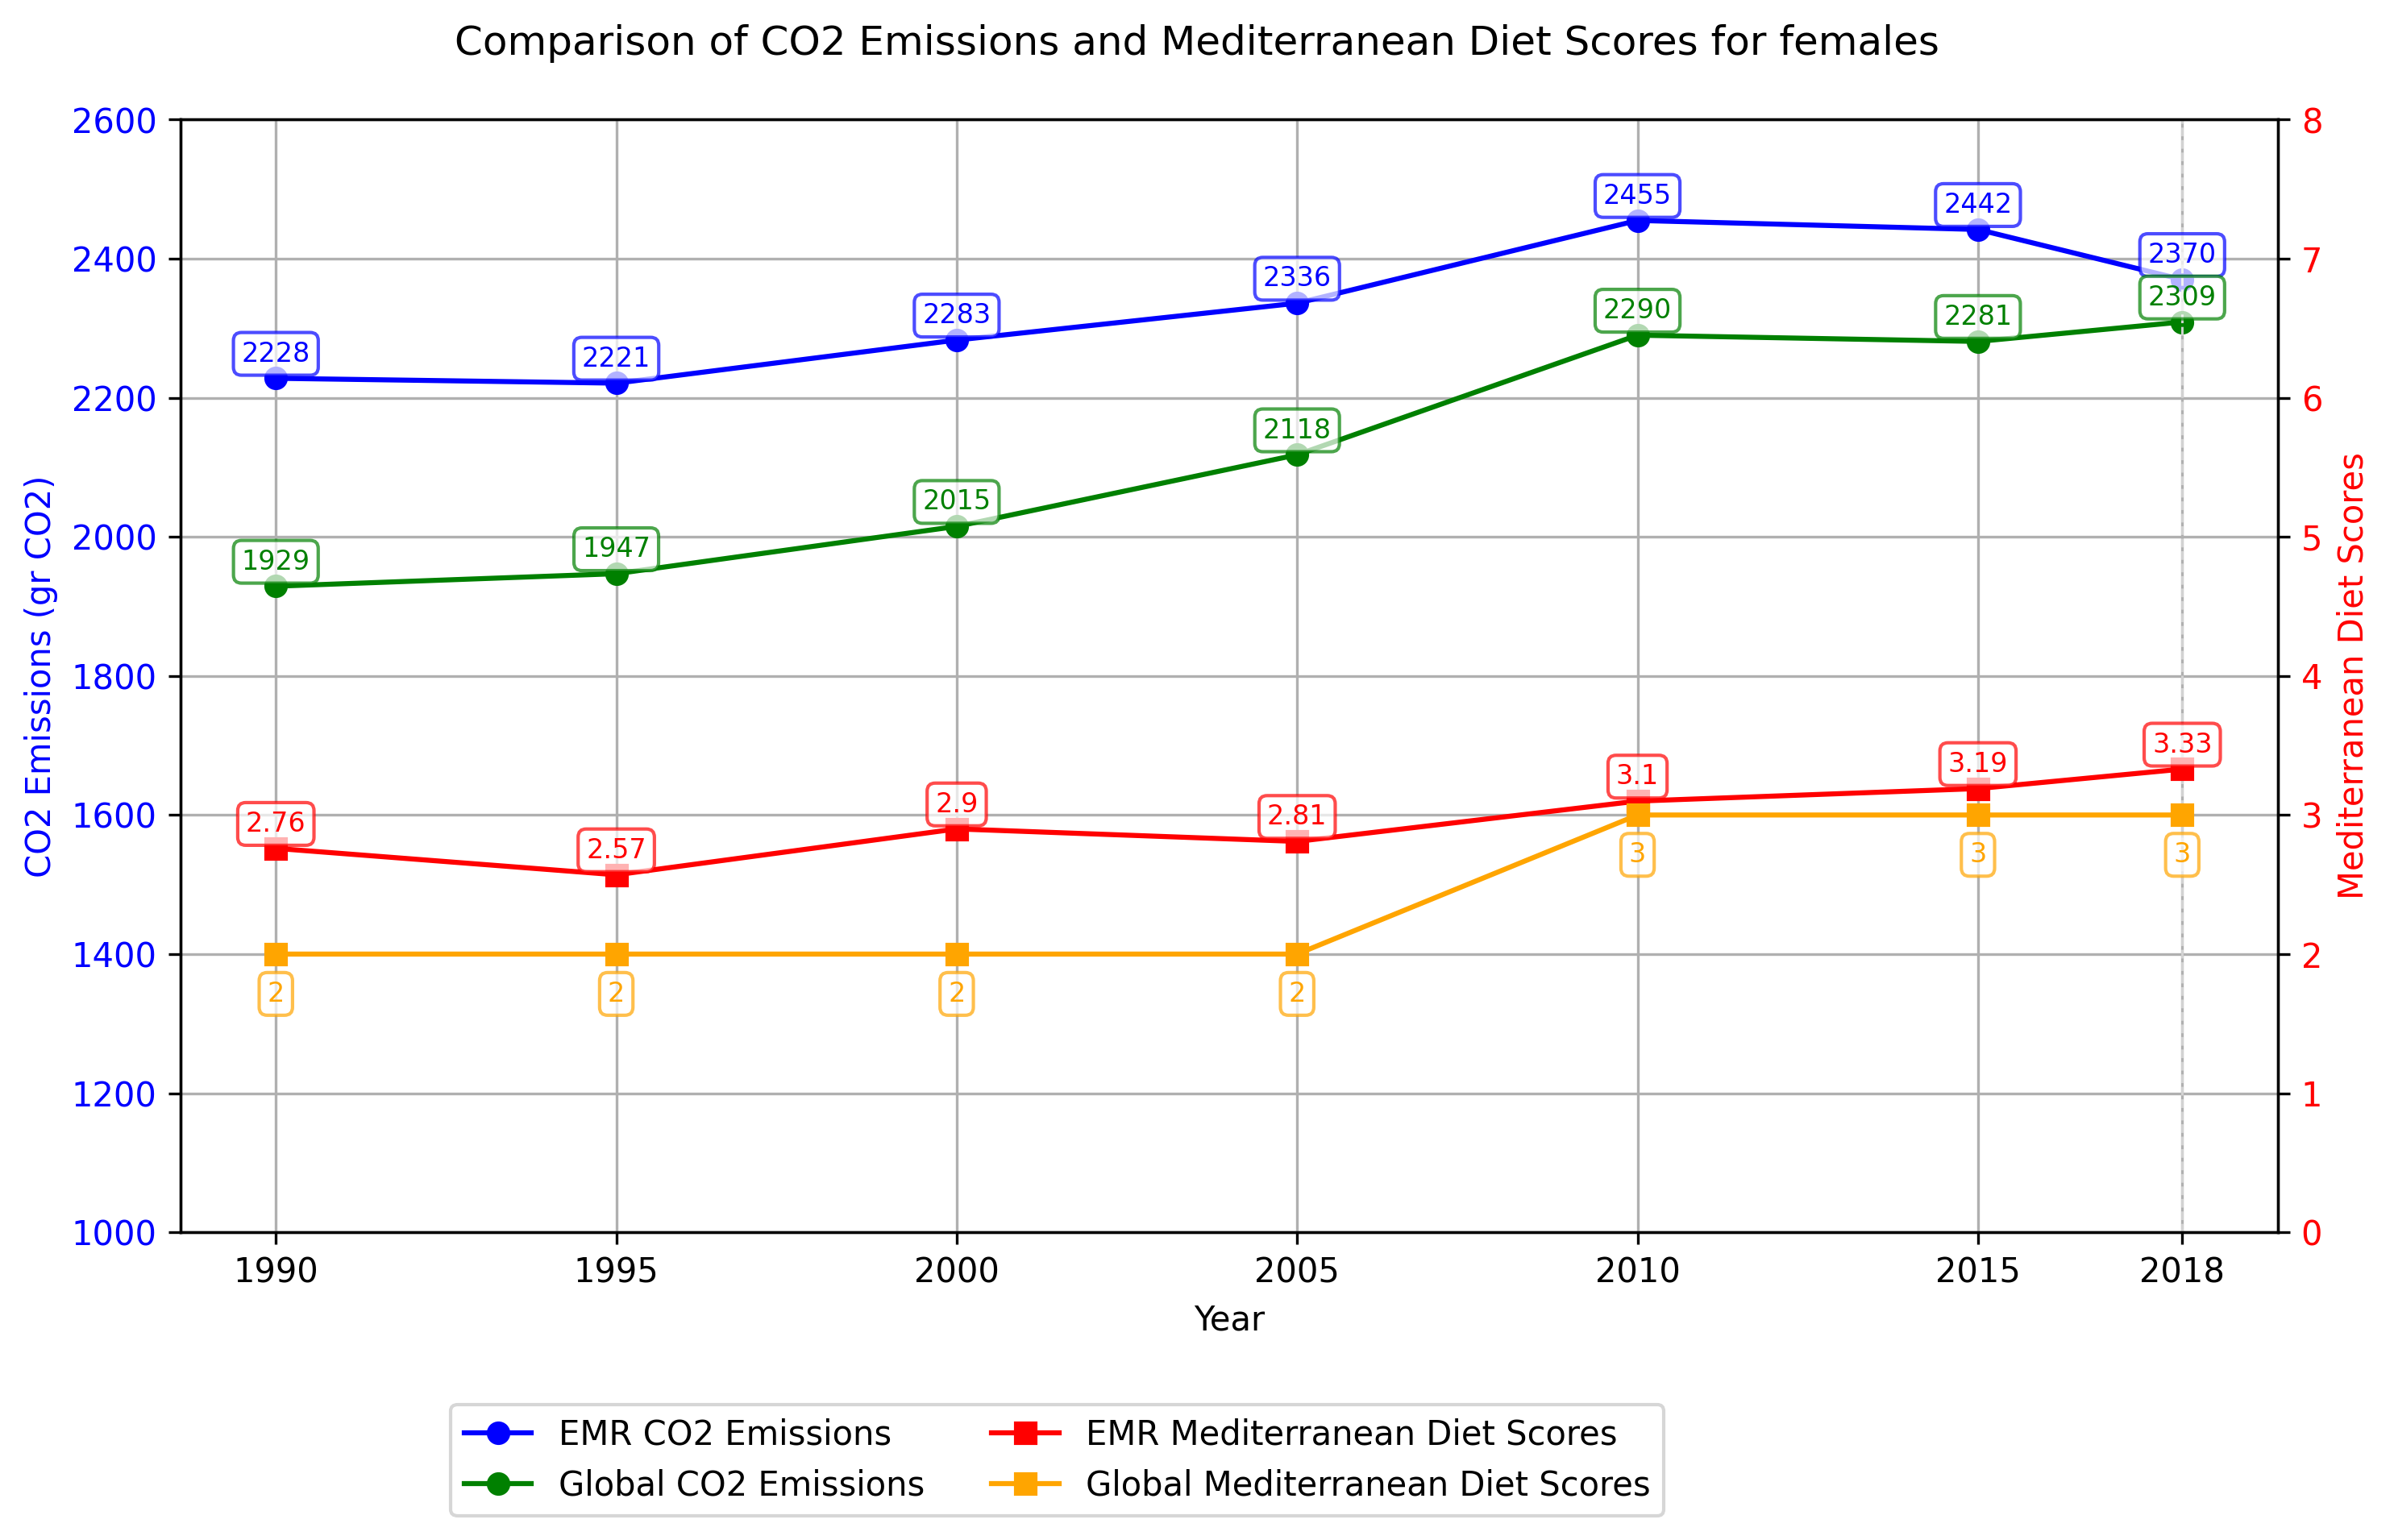

In [106]:
emr_medit_males = pd.read_csv(r'diet_calc\scores\medit_new\total_males.csv')
glo_medit_males = pd.read_csv(r'diet_calc\scores\medit_new\global\total_males.csv')

emr_medit_females = pd.read_csv(r'diet_calc\scores\medit_new\total_females.csv')
glo_medit_females = pd.read_csv(r'diet_calc\scores\medit_new\global\total_females.csv')

medit_plots(emr_co2, global_co2, emr_medit_males, glo_medit_males, 'Mediterranean Diet', 'males')
medit_plots(emr_co2, global_co2, emr_medit_females, glo_medit_females, 'Mediterranean Diet', 'females')

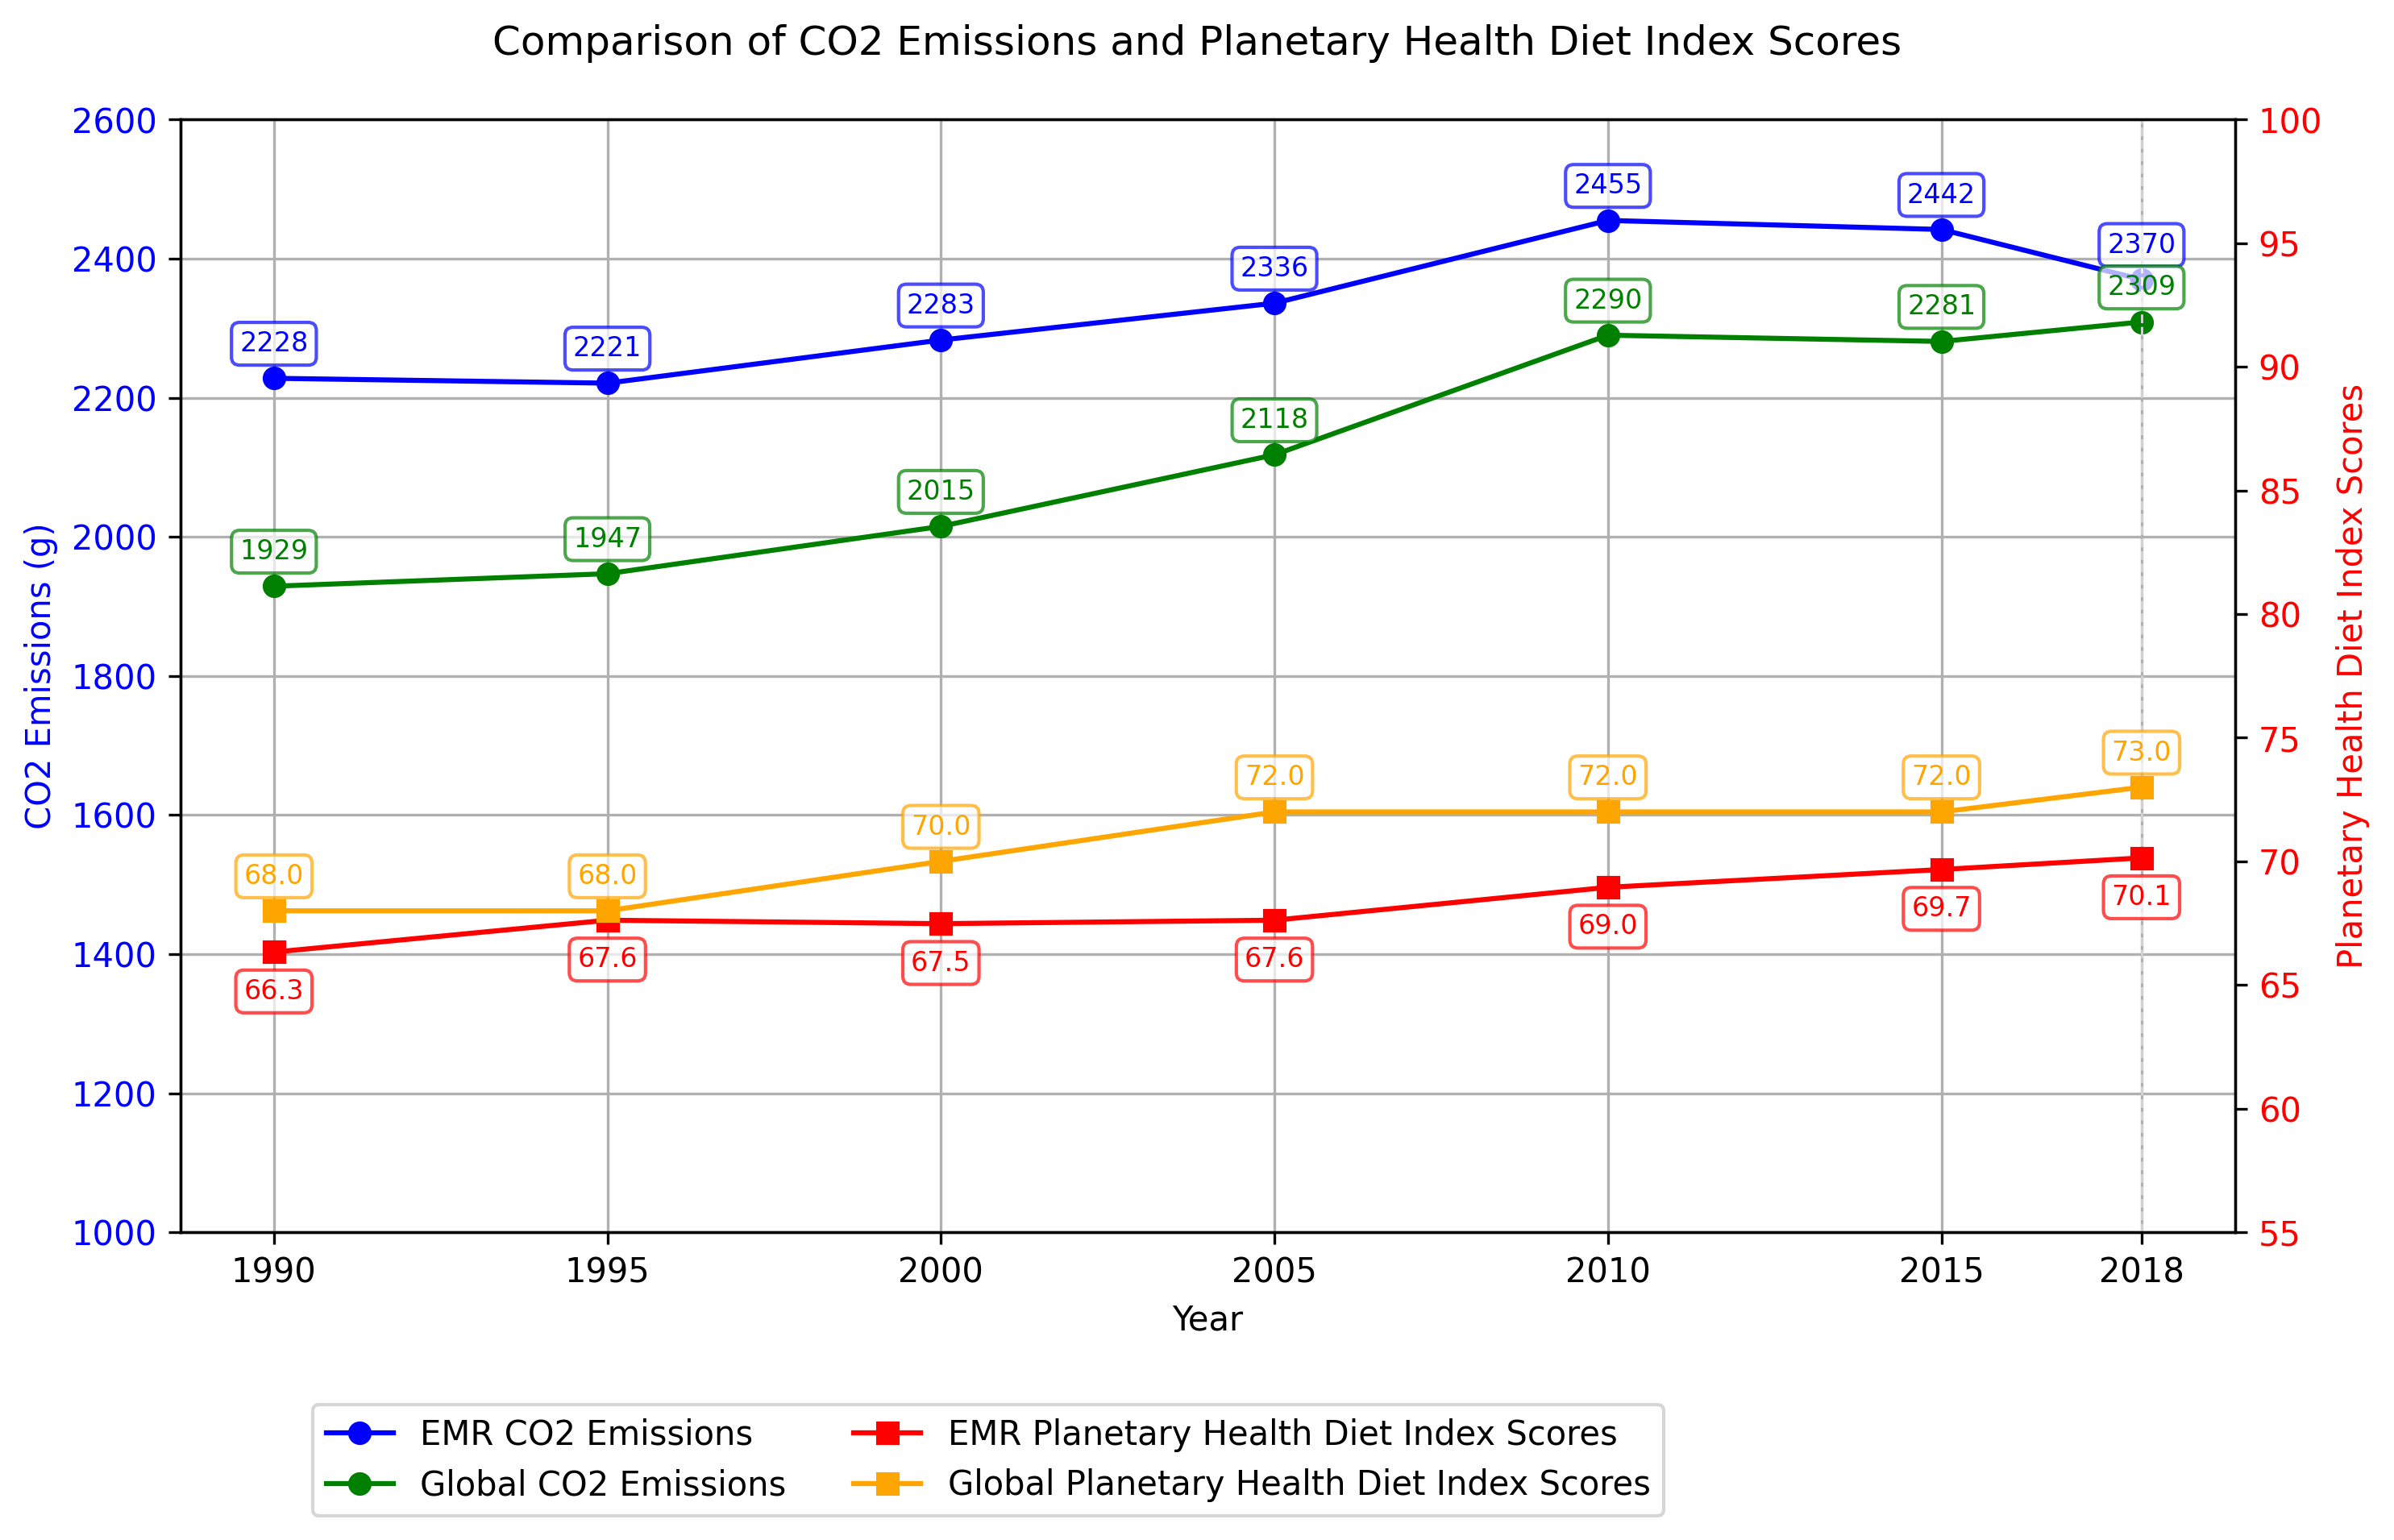

In [18]:
emr_phdi = pd.read_csv(r'diet_calc\scores\phdi\total_all.csv')
glo_phdi = pd.read_csv(r'diet_calc\scores\phdi_global\total_all.csv')
glo_phdi = eat_fix(glo_phdi)

def phdi_plots(emr_co2, global_co2, emr_diet, global_diet, name: str, gender: str = 'all'):
    # Average emissions by year
    emr_all_co2 = emr_co2.groupby('year')['emissions'].mean().reset_index().round(0).astype({'emissions': int})[:7]
    global_all_co2 = global_co2[:7].round(0).astype({'emissions': int})

    # Format diet scores
    emr_diet_ready = pd.DataFrame({
        'year': emr_diet.columns[1:].astype(int),
        'score': emr_diet.iloc[:, 1:].mean().round(2).values
    })
    global_diet_ready = global_diet.astype({'year': int, 'score': float})

    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

    # CO2 emissions (left axis)
    ax1.plot(emr_all_co2['year'], emr_all_co2['emissions'], label='EMR CO2 Emissions', marker='o', color='blue')
    ax1.plot(global_all_co2['year'], global_all_co2['emissions'], label='Global CO2 Emissions', marker='o', color='green')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2 Emissions (g)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(1000, 2600)
    ax1.axvline(x=2018, color='lightgray', linestyle='--', linewidth=0.7)
    ax1.set_xticks(sorted(set(ax1.get_xticks()) | {2018}))
    ax1.grid(True)

    # Annotate emissions
    for df, color in [(emr_all_co2, 'blue'), (global_all_co2, 'green')]:
        for _, row in df.iterrows():
            ax1.annotate(f"{row['emissions']}", (row['year'], row['emissions']),
                         textcoords="offset points", xytext=(0, 8), ha='center',
                         fontsize=8, color=color,
                         bbox=dict(boxstyle="round,pad=0.3", edgecolor=color, facecolor='white', alpha=0.7))

    # Diet scores (right axis)
    ax2 = ax1.twinx()
    ax2.plot(emr_diet_ready['year'], emr_diet_ready['score'], label=f'EMR {name} Scores', marker='s', color='red')
    ax2.plot(global_diet_ready['year'], global_diet_ready['score'], label=f'Global {name} Scores', marker='s', color='orange')
    ax2.set_ylabel(f'{name} Scores', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(55, 100)

    # Annotate EMR scores with conditional offset
    for _, row in emr_diet_ready.iterrows():
        if gender == 'males' and row['year'] == 1995:
            y_offset = 10  # default (above point)
        else:
            y_offset = -14  # below point

        ax2.annotate(f"{row['score']:.1f}", (row['year'], row['score']),
                     textcoords="offset points", xytext=(0, y_offset), ha='center',
                     fontsize=8, color='red',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))

    # Annotate Global scores (always above)
    for _, row in global_diet_ready.iterrows():
        ax2.annotate(f"{row['score']:.1f}", (row['year'], row['score']),
                     textcoords="offset points", xytext=(0, 8), ha='center',
                     fontsize=8, color='orange',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white', alpha=0.7))

    # Title and legend
    title = f'Comparison of CO2 Emissions and {name} Scores'
    if gender != 'all':
        title += f' for {gender.capitalize()}'
    fig.suptitle(title)

    fig.legend(loc='center right', bbox_to_anchor=(0.7, -0.01), ncol=2)
    plt.tight_layout(rect=[0, 0.05, 1, 1])

    # Save
    os.makedirs(f'figures/{gender}', exist_ok=True)
    plt.savefig(f'figures/{gender}/PHDI_co2_diet.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example call
phdi_plots(emr_co2, global_co2, emr_phdi, glo_phdi, 'Planetary Health Diet Index', 'all')

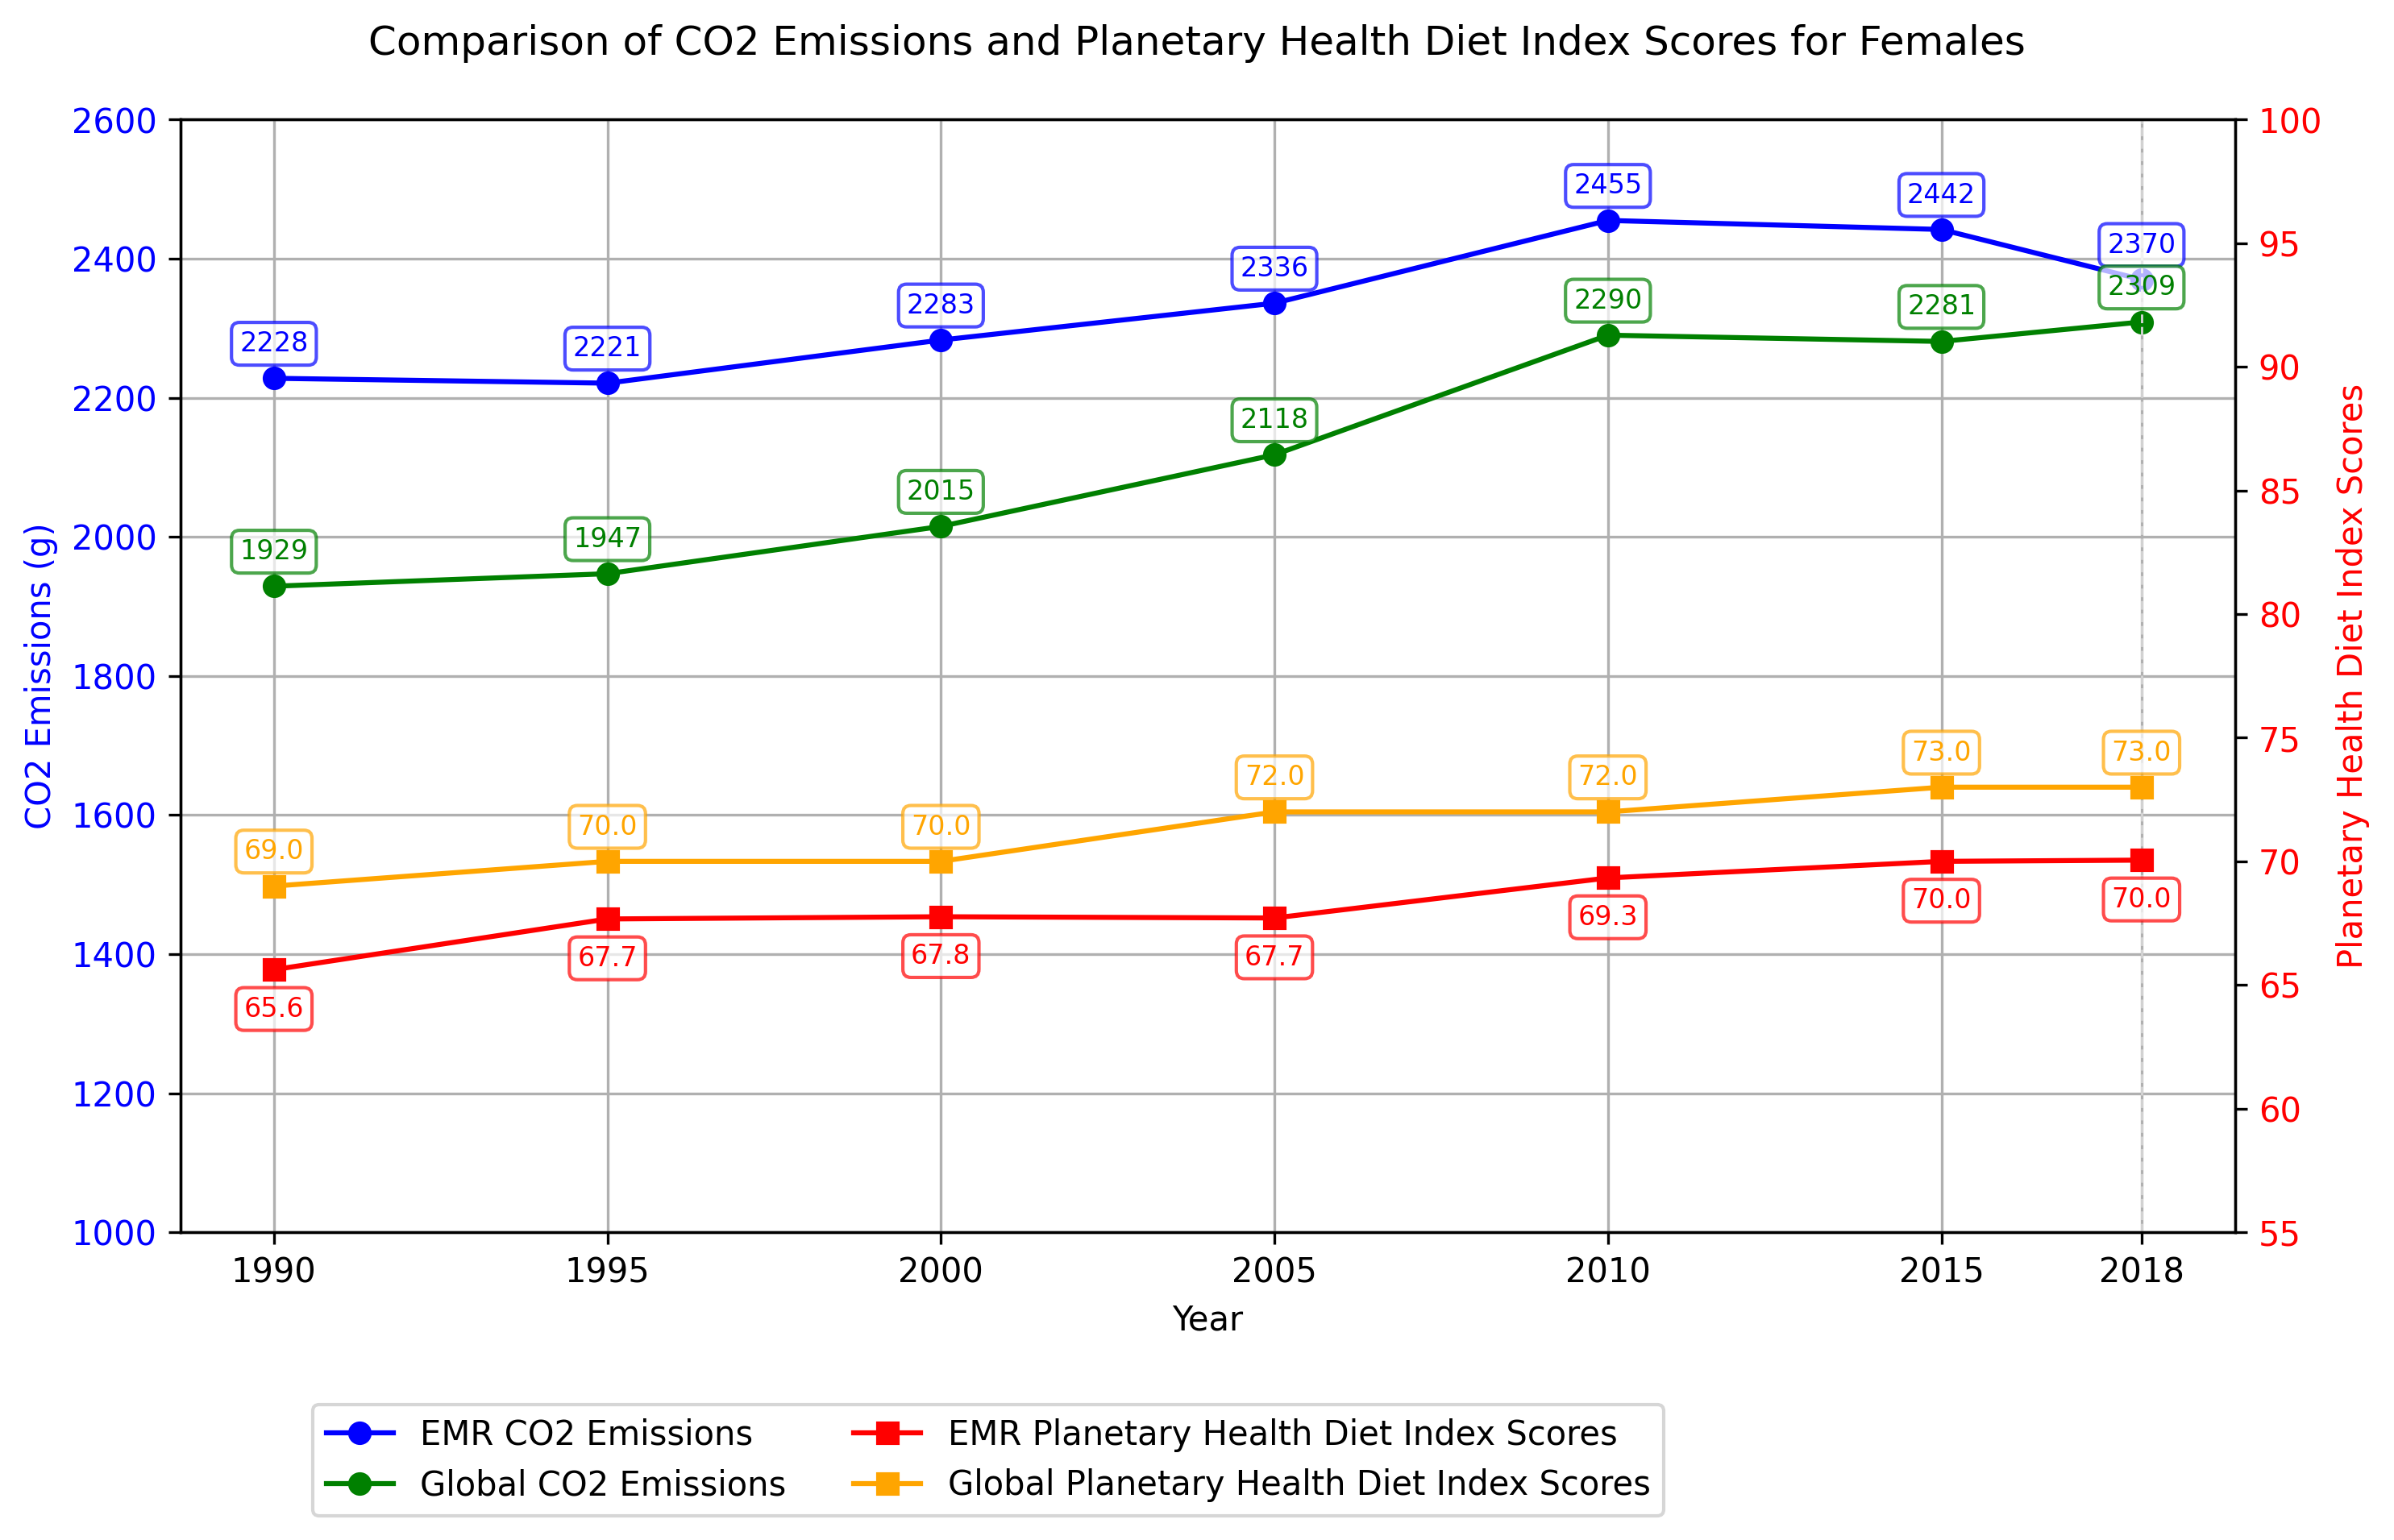

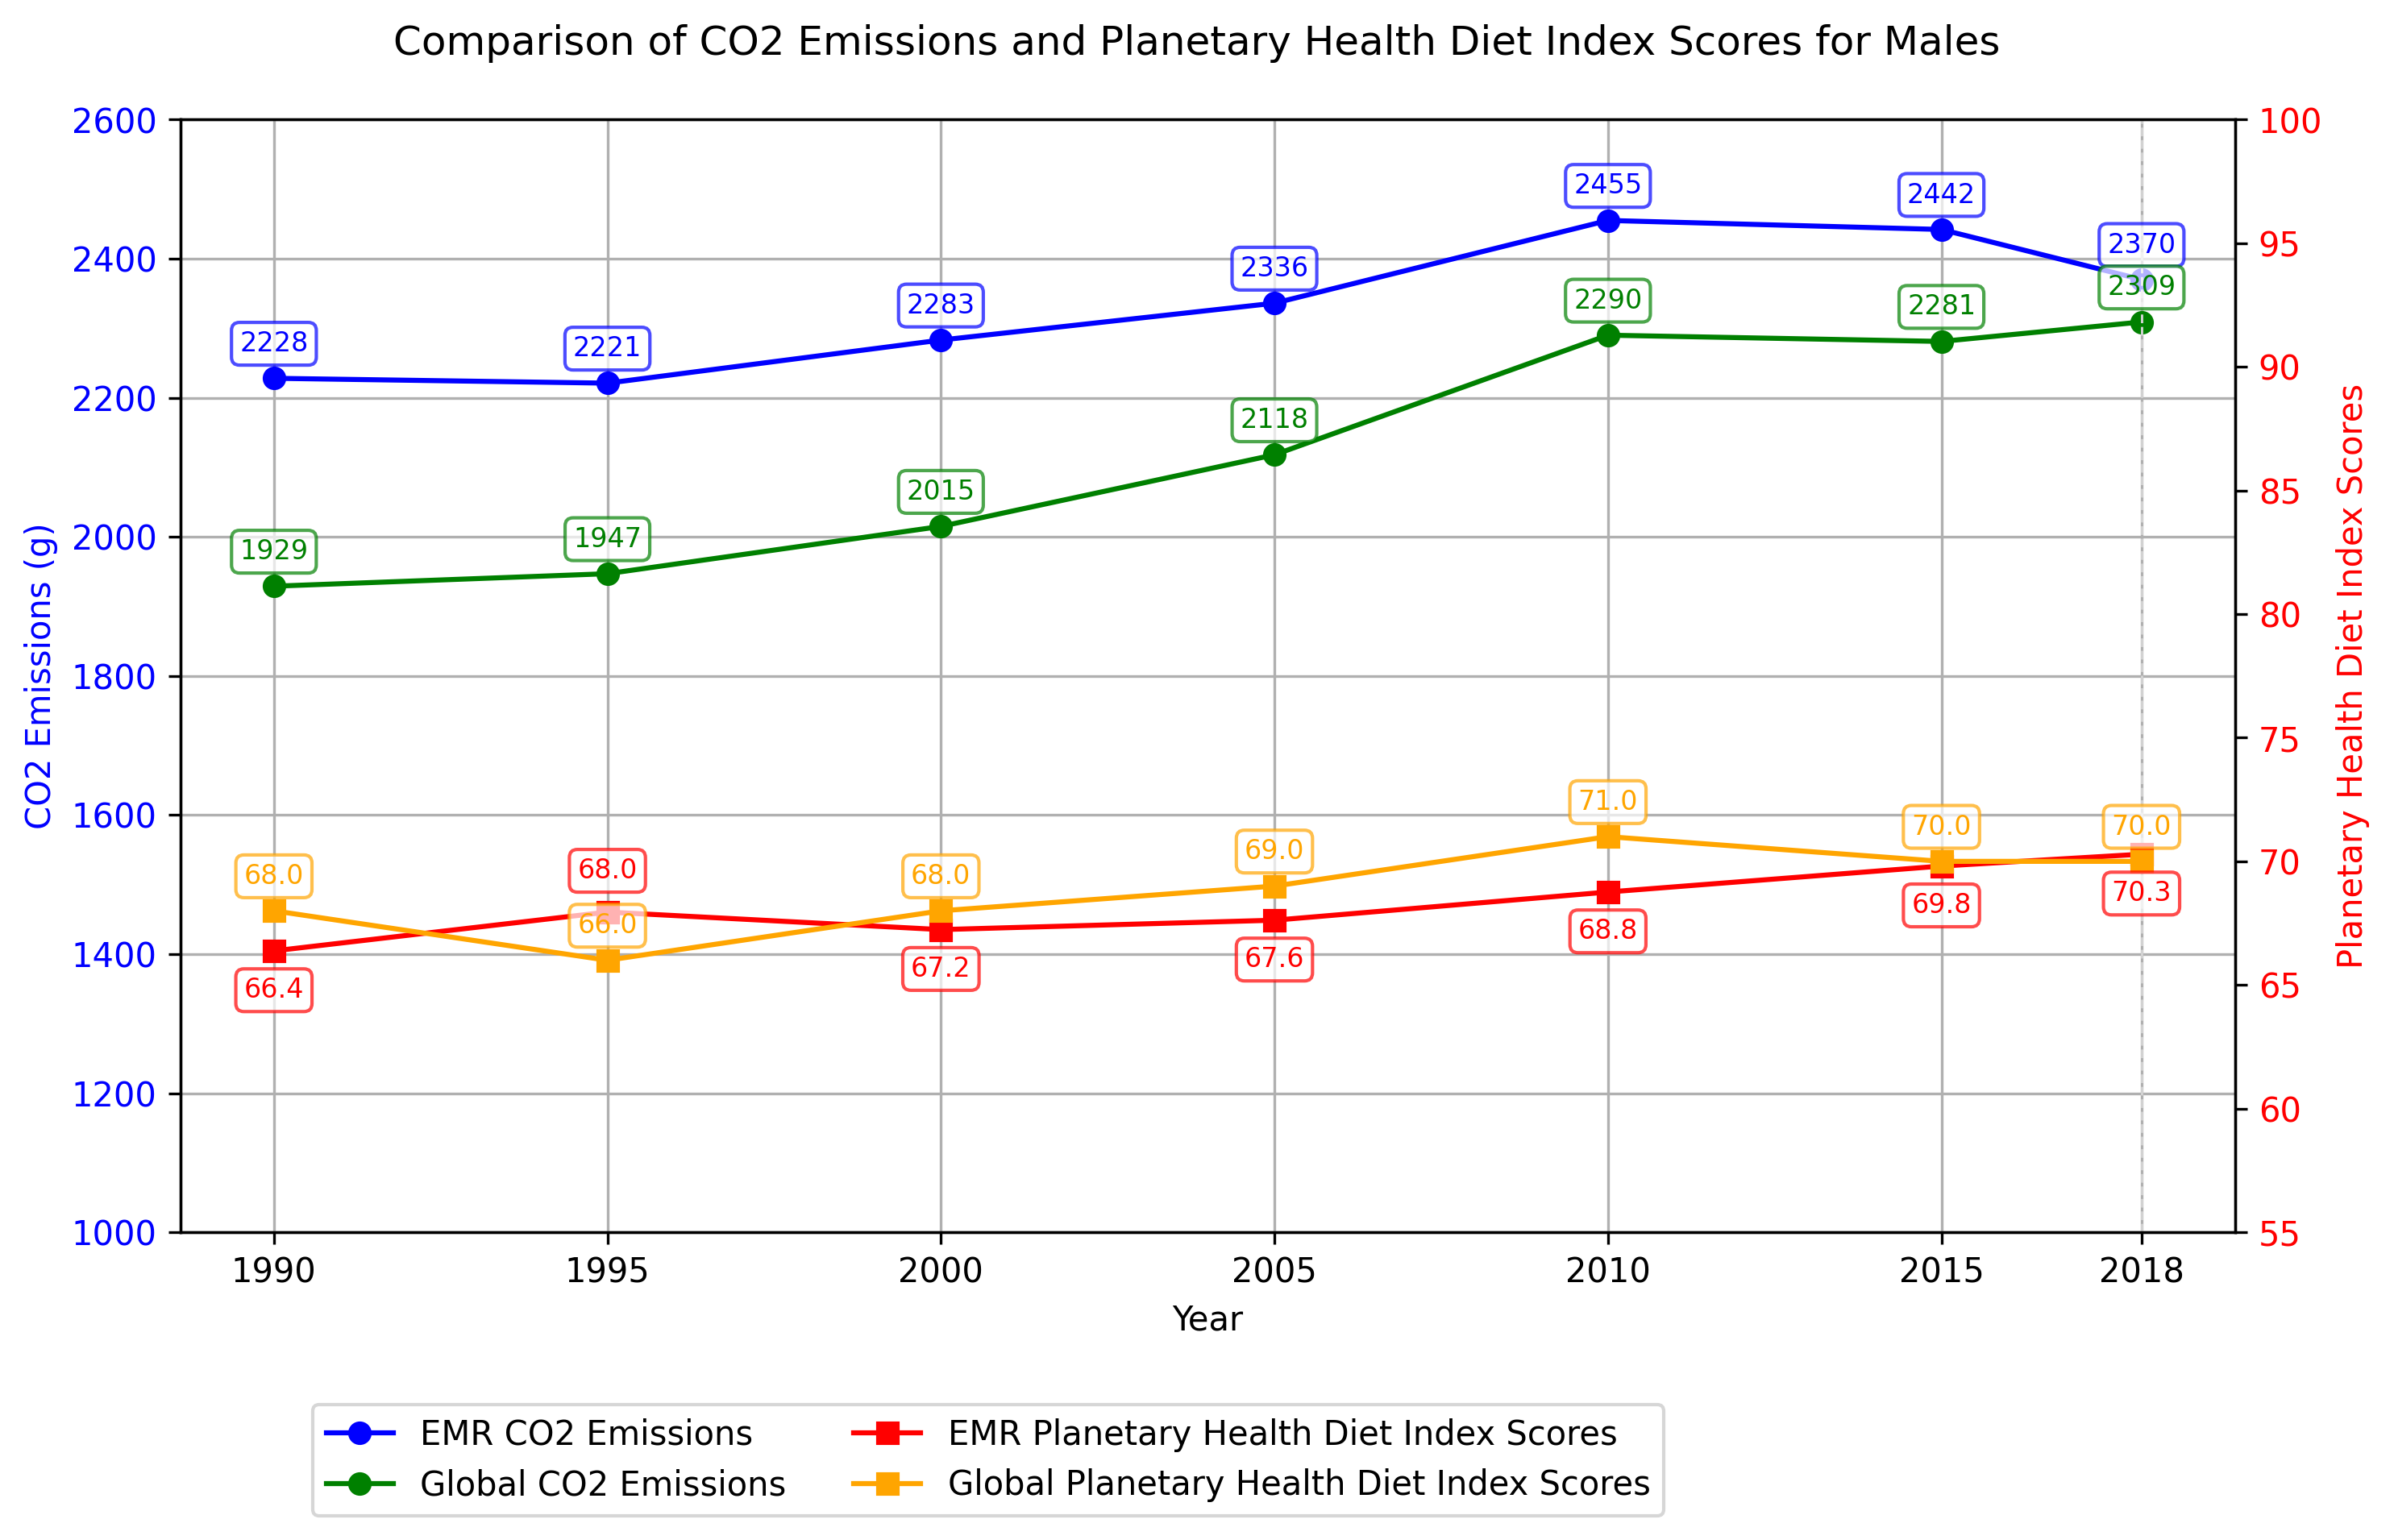

In [19]:
em_phdi_male = pd.read_csv(r'diet_calc\scores\phdi\total_males.csv')
gl_phdi_male = pd.read_csv(r'diet_calc\scores\phdi_global\total_males.csv')
gl_phdi_male = eat_fix(gl_phdi_male)

em_phdi_female = pd.read_csv(r'diet_calc\scores\phdi\total_females.csv')
gl_phdi_female = pd.read_csv(r'diet_calc\scores\phdi_global\total_females.csv')
gl_phdi_female = eat_fix(gl_phdi_female)

# Generate the plots for females using eat_plots
phdi_plots(emr_co2, global_co2, em_phdi_female, gl_phdi_female,'Planetary Health Diet Index', 'females')
phdi_plots(emr_co2, global_co2, em_phdi_male, gl_phdi_male, 'Planetary Health Diet Index', 'males')

### Now to visualize the emission for each component 

In [110]:
import glob 
import os

emr = glob.glob('co2_calc\emissions_v2\*_all.csv') 
emr = [file for file in emr if 'total_all.csv' not in file]
emr

['co2_calc\\emissions_v2\\Beans_and_legumes_all.csv',
 'co2_calc\\emissions_v2\\Cheese_all.csv',
 'co2_calc\\emissions_v2\\Eggs_all.csv',
 'co2_calc\\emissions_v2\\Fruits_all.csv',
 'co2_calc\\emissions_v2\\Fruit_juices_all.csv',
 'co2_calc\\emissions_v2\\Milk_all.csv',
 'co2_calc\\emissions_v2\\Non_starchy_vegetables_all.csv',
 'co2_calc\\emissions_v2\\Nuts_all.csv',
 'co2_calc\\emissions_v2\\Other_starchy_vegetables_all.csv',
 'co2_calc\\emissions_v2\\Potatoes_all.csv',
 'co2_calc\\emissions_v2\\refined_grains_all.csv',
 'co2_calc\\emissions_v2\\seafoods_all.csv',
 'co2_calc\\emissions_v2\\Total_processed_meats_all.csv',
 'co2_calc\\emissions_v2\\Unprocessed_red_meats_all.csv',
 'co2_calc\\emissions_v2\\whole_grains_all.csv',
 'co2_calc\\emissions_v2\\Yoghurt_all.csv']

In [111]:
globs = [i.replace('emissions_v2', 'global_emissions') for i in emr]
globs

['co2_calc\\global_emissions\\Beans_and_legumes_all.csv',
 'co2_calc\\global_emissions\\Cheese_all.csv',
 'co2_calc\\global_emissions\\Eggs_all.csv',
 'co2_calc\\global_emissions\\Fruits_all.csv',
 'co2_calc\\global_emissions\\Fruit_juices_all.csv',
 'co2_calc\\global_emissions\\Milk_all.csv',
 'co2_calc\\global_emissions\\Non_starchy_vegetables_all.csv',
 'co2_calc\\global_emissions\\Nuts_all.csv',
 'co2_calc\\global_emissions\\Other_starchy_vegetables_all.csv',
 'co2_calc\\global_emissions\\Potatoes_all.csv',
 'co2_calc\\global_emissions\\refined_grains_all.csv',
 'co2_calc\\global_emissions\\seafoods_all.csv',
 'co2_calc\\global_emissions\\Total_processed_meats_all.csv',
 'co2_calc\\global_emissions\\Unprocessed_red_meats_all.csv',
 'co2_calc\\global_emissions\\whole_grains_all.csv',
 'co2_calc\\global_emissions\\Yoghurt_all.csv']

In [115]:
# Color settings: global = blue, EMR = red
glob_col = "#08589e"   # dark blue
emr_col  = "#de2d26"   # red

for csv_emr, csv_glob in zip(emr, globs):
    # Load and filter
    name = csv_emr.split('\\')[2].split('_all')[0].replace('_', ' ').title()
    emr_df  = pd.read_csv(csv_emr)
    glob_df = pd.read_csv(csv_glob)
    emr_df  = emr_df[emr_df['iso3'] == 'EMR']

    # Compute padding for y-limits
    em_min, em_max = (min(emr_df['emissions'].min(), glob_df['emissions'].min()),
                      max(emr_df['emissions'].max(), glob_df['emissions'].max()))
    em_pad = (em_max - em_min) * 0.25

    con_min, con_max = (min(emr_df['median'].min(), glob_df['median'].min()),
                        max(emr_df['median'].max(), glob_df['median'].max()))
    con_pad = (con_max - con_min) * 0.25

    # Create side-by-side subplots
    fig, (ax_em, ax_con) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
    fig.suptitle(f'Comparison of CO₂ Emissions and Consumption for {name}')
    # ─── Emissions subplot ─────────────────────────────────────────────────────
    ax_em.plot(glob_df['year'], glob_df['emissions'],
               label='Global CO₂ Emissions', marker='o', color=glob_col)
    ax_em.plot(emr_df['year'], emr_df['emissions'],
               label='EMR CO₂ Emissions', marker='o', color=emr_col)
    ax_em.set_title('CO₂ Emissions')
    ax_em.set_xlabel('Year')
    ax_em.set_ylabel('Emissions (gr CO₂)')
    ax_em.set_ylim(em_min - em_pad, em_max + em_pad)
    ax_em.grid(True, linestyle=':', alpha=0.7)

    # Rotate x-ticks 45°
    ax_em.set_xticks(sorted(set(list(ax_em.get_xticks()) + [2018])))
    ax_em.tick_params(axis='x', rotation=45)

    # Annotate emissions
    for df, clr in [(glob_df, glob_col), (emr_df, emr_col)]:
        for _, row in df.iterrows():
            ax_em.annotate(
                f"{round(row['emissions'])}",
                (row['year'], row['emissions']),
                textcoords="offset points", xytext=(0, 5), ha='center',
                fontsize=7, color=clr,
                bbox=dict(boxstyle="round,pad=0.2", edgecolor=clr,
                          facecolor='white', alpha=0.7)
            )
    ax_em.legend()

    # ─── Consumption subplot ──────────────────────────────────────────────────
    ax_con.plot(glob_df['year'], glob_df['median'],
                label='Global Consumption', marker='s', color=glob_col)
    ax_con.plot(emr_df['year'], emr_df['median'],
                label='EMR Consumption (mean)', marker='s', color=emr_col)
    ax_con.set_title('Consumption')
    ax_con.set_xlabel('Year')
    ax_con.set_ylabel('Consumption (gr)')
    ax_con.set_ylim(con_min - con_pad, con_max + con_pad)
    ax_con.grid(True, linestyle=':', alpha=0.7)

    # Rotate x-ticks 45°
    ax_con.set_xticks(sorted(set(list(ax_con.get_xticks()) + [2018])))
    ax_con.tick_params(axis='x', rotation=45)

    # Annotate consumption
    for df, clr in [(glob_df, glob_col), (emr_df, emr_col)]:
        for _, row in df.iterrows():
            ax_con.annotate(
                f"{round(row['median'])}",
                (row['year'], row['median']),
                textcoords="offset points", xytext=(0, 5), ha='center',
                fontsize=7, color=clr,
                bbox=dict(boxstyle="round,pad=0.2", edgecolor=clr,
                          facecolor='white', alpha=0.7)
            )
    ax_con.legend()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # Adjust top to make space for the title
    os.makedirs(f'figures\components_mean', exist_ok=True)
    plt.savefig(f'figures\components_mean\{name}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)


### now emissions v3 (EMR values calculated using median of the countries' consumptions)

In [5]:
# Color settings: global = blue, EMR = red
glob_col = "#08589e"   # dark blue
emr_col  = "#de2d26"   # red

emr_v3 = glob.glob('co2_calc\emissions_v3\*_all.csv') 
emr_v3 = [file for file in emr_v3 if 'total_all.csv' not in file]
globs_v3 = [i.replace('emissions_v3', 'global_emissions') for i in emr_v3]

In [6]:
for csv_emr, csv_glob in zip(emr_v3, globs_v3):
    # Load and filter
    name = csv_emr.split('\\')[2].split('_all')[0].replace('_', ' ').title()
    emr_df  = pd.read_csv(csv_emr)
    glob_df = pd.read_csv(csv_glob)
    emr_df  = emr_df[emr_df['iso3'] == 'EMR']

    # Compute padding for y-limits
    em_min, em_max = (min(emr_df['emissions'].min(), glob_df['emissions'].min()),
                      max(emr_df['emissions'].max(), glob_df['emissions'].max()))
    em_pad = (em_max - em_min) * 0.25

    con_min, con_max = (min(emr_df['median'].min(), glob_df['median'].min()),
                        max(emr_df['median'].max(), glob_df['median'].max()))
    con_pad = (con_max - con_min) * 0.25

    # Create side-by-side subplots
    fig, (ax_em, ax_con) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
    fig.suptitle(f'Comparison of CO₂ Emissions and Consumption for {name}')
    # ─── Emissions subplot ─────────────────────────────────────────────────────
    ax_em.plot(glob_df['year'], glob_df['emissions'],
               label='Global CO₂ Emissions', marker='o', color=glob_col)
    ax_em.plot(emr_df['year'], emr_df['emissions'],
               label='EMR CO₂ Emissions', marker='o', color=emr_col)
    ax_em.set_title('CO₂ Emissions')
    ax_em.set_xlabel('Year')
    ax_em.set_ylabel('Emissions (gr CO₂)')
    ax_em.set_ylim(em_min - em_pad, em_max + em_pad)
    ax_em.grid(True, linestyle=':', alpha=0.7)

    # Rotate x-ticks 45°
    ax_em.set_xticks(sorted(set(list(ax_em.get_xticks()) + [2018])))
    ax_em.tick_params(axis='x', rotation=45)

    # Annotate emissions
    for df, clr in [(glob_df, glob_col), (emr_df, emr_col)]:
        for _, row in df.iterrows():
            ax_em.annotate(
                f"{round(row['emissions'])}",
                (row['year'], row['emissions']),
                textcoords="offset points", xytext=(0, 5), ha='center',
                fontsize=7, color=clr,
                bbox=dict(boxstyle="round,pad=0.2", edgecolor=clr,
                          facecolor='white', alpha=0.7)
            )
    ax_em.legend()

    # ─── Consumption subplot ──────────────────────────────────────────────────
    ax_con.plot(glob_df['year'], glob_df['median'],
                label='Global Consumption', marker='s', color=glob_col)
    ax_con.plot(emr_df['year'], emr_df['median'],
                label='EMR Consumption (median)', marker='s', color=emr_col)
    ax_con.set_title('Consumption')
    ax_con.set_xlabel('Year')
    ax_con.set_ylabel('Consumption (gr)')
    ax_con.set_ylim(con_min - con_pad, con_max + con_pad)
    ax_con.grid(True, linestyle=':', alpha=0.7)

    # Rotate x-ticks 45°
    ax_con.set_xticks(sorted(set(list(ax_con.get_xticks()) + [2018])))
    ax_con.tick_params(axis='x', rotation=45)

    # Annotate consumption
    for df, clr in [(glob_df, glob_col), (emr_df, emr_col)]:
        for _, row in df.iterrows():
            ax_con.annotate(
                f"{round(row['median'])}",
                (row['year'], row['median']),
                textcoords="offset points", xytext=(0, 5), ha='center',
                fontsize=7, color=clr,
                bbox=dict(boxstyle="round,pad=0.2", edgecolor=clr,
                          facecolor='white', alpha=0.7)
            )
    ax_con.legend()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # Adjust top to make space for the title
    os.makedirs(f'figures\components_median', exist_ok=True)
    plt.savefig(f'figures\components_median\{name}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)